# Experiment Analysis Number Of Patterns Retained 
In this notebook we will evaluate the results form the experiments executed. For each experiment, one parameter is changed and all others were kept constant as to determine the effect of one variable. 

**The goals of this analysis are:**
1. Determine the relationship of the number of parameters in the neural network and the number of random uncorrelated patterns that were retained 
2. Investigate which activation function lead to the highest retention of patterns
3. Determine what effect bidirectional RNNs has on this relationship
4. Determine the effect of increasing the number of layers have on pattern retention

To determine whether a relationshop exists between the variable being investigated and the number of required parameters in each respective neural network, the Pearson correlation coefficient is used. The domain of this metric lies between -1 and +1 or in mathematical notation $P \in [-1, 1]$. If there exists a strong positive relationship between variables, the Pearson coefficient will approach +1 and for the negative case -1. 

In [1]:
import pandas as pd 
import numpy as np
import scipy
import sklearn
import pandas as pd
from sqlalchemy import Column, Integer, String
from sqlalchemy import create_engine, Column
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Number of Patterns Analysis

In [2]:
! ls  /home/danielp/Documents/Masters/Code/memory_capacity_retention_rnns/danny_masters/from_server/ | wc -l

6


In [3]:
! ls /home/danielp/Documents/Masters/Code/danny_masters

100_0_False_longest_sequence.log   100_0_True_longest_sequence.log
100_0_False_num_patterns.log	   100_0_True_num_patterns.log
100_0_False_volume_experiment.log  100_0_True_volume_experiment.log


In [4]:
print("INFO:root:bidirgru;linear;4536;[216];3;4;282961;1;{'val_loss': [0.28120091557502747, 0.1132935956120491], 'loss': [0.41719042882323265, 0.19011458661407232], 'lr': [0.001, 0.001]};1.0".count(";"))
print("INFO:root:lstm;softmax;504;[420, 42];0;5;786787;699;{'val_loss': [0.3983786255121231, 0.38453641533851624, 0.37102413177490234, 0.35796700417995453, 0.3453146666288376, 0.3330612927675247, 0.32121409475803375, 0.3097362518310547, 0.2987896651029587, 0.2881261706352234, 0.2778322100639343, 0.26803746819496155, 0.25844745337963104, 0.2492733672261238, 0.24045316129922867, 0.2320057973265648, 0.22390616685152054, 0.21603740751743317, 0.20860742777585983, 0.20134034752845764, 0.19443238526582718, 0.18777956068515778, 0.18148573487997055, 0.17552954703569412, 0.16970320791006088, 0.16423241794109344, 0.15901590138673782, 0.15400884300470352, 0.14939148724079132, 0.14484168589115143, 0.14052481949329376, 0.1363724321126938, 0.13253740966320038, 0.12893234938383102, 0.12547318637371063, 0.12218526750802994, 0.11913982406258583, 0.11624228209257126, 0.1134972907602787, 0.11090944707393646, 0.10857299715280533, 0.10638427734375, 0.10427320003509521, 0.10227495804429054, 0.10043990612030029, 0.09870023652911186, 0.09711764380335808, 0.09561265632510185, 0.09424823522567749, 0.09297456219792366, 0.09179184213280678, 0.09071826562285423, 0.08970387652516365, 0.08881306275725365, 0.08799967914819717, 0.08725852891802788, 0.08655820786952972, 0.08593429252505302, 0.08534976840019226, 0.08481515944004059, 0.08431608602404594, 0.08388398215174675, 0.08351462334394455, 0.08317387104034424, 0.0828644409775734, 0.08258114755153656, 0.08232851326465607, 0.08212883770465851, 0.08193894848227501, 0.08175777271389961, 0.08162573724985123, 0.08149046450853348, 0.08138538524508476, 0.08129540458321571, 0.0812181867659092, 0.08114006742835045, 0.08108066767454147, 0.0810345746576786, 0.08099574595689774, 0.08096638694405556, 0.08094511553645134, 0.08092690259218216, 0.08091053366661072, 0.08090177178382874, 0.08089762926101685, 0.08089552447199821, 0.08089630678296089, 0.08089904859662056, 0.08090488985180855, 0.08091182634234428, 0.08091302961111069, 0.08091454952955246, 0.08091641962528229, 0.08091770485043526, 0.08091961964964867, 0.08092164620757103, 0.08092299476265907, 0.08092446997761726, 0.08092684671282768, 0.08092834427952766, 0.0809287540614605, 0.08092892915010452, 0.08092926815152168, 0.08092979341745377, 0.08093004673719406, 0.08093057945370674, 0.08093081787228584, 0.08093129843473434, 0.08093157783150673, 0.08093202114105225, 0.08093208819627762, 0.08093219250440598, 0.08093225210905075, 0.0809323601424694, 0.08093240484595299, 0.08093249797821045, 0.08093256875872612, 0.08093263953924179, 0.08093273639678955, 0.08093282207846642, 0.08093284070491791, 0.0809328518807888, 0.08093288540840149, 0.08093288168311119, 0.08093291521072388, 0.08093293383717537, 0.08093294501304626, 0.08093294873833656, 0.08093296363949776, 0.08093299344182014, 0.08093298971652985, 0.08093299344182014, 0.08093300834298134, 0.08093300461769104, 0.08093301206827164, 0.08093301951885223, 0.08093303442001343, 0.08093303442001343, 0.08093302696943283, 0.08093303442001343, 0.08093303442001343, 0.08093304932117462, 0.08093304932117462, 0.08093303814530373, 0.08093303814530373, 0.08093303814530373, 0.08093303814530373, 0.08093303814530373, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313, 0.08093303069472313], 'loss': [0.4252263940870762, 0.4107074700295925, 0.3967253491282463, 0.38293588161468506, 0.36963945627212524, 0.3567313514649868, 0.3442135415971279, 0.332243625074625, 0.3203633688390255, 0.3092553988099098, 0.29840399138629436, 0.28772095777094364, 0.27783876843750477, 0.2680079285055399, 0.25859800539910793, 0.24951045960187912, 0.24078041687607765, 0.23254163190722466, 0.22432496584951878, 0.21680372022092342, 0.2093129064887762, 0.20227103307843208, 0.19535507448017597, 0.18873452208936214, 0.18268926441669464, 0.17658725008368492, 0.17087750602513552, 0.16547849215567112, 0.16006775572896004, 0.15532528050243855, 0.15059258230030537, 0.14619070943444967, 0.141777235083282, 0.13768674992024899, 0.13391122221946716, 0.13030045479536057, 0.1267700418829918, 0.12354664504528046, 0.12049439549446106, 0.11760237347334623, 0.11472619976848364, 0.11214588209986687, 0.1098040072247386, 0.10755961108952761, 0.10537664964795113, 0.10342059750109911, 0.10149191226810217, 0.09979743976145983, 0.0981165124103427, 0.09661287069320679, 0.09520806930959225, 0.09386604651808739, 0.09269081987440586, 0.09149063471704721, 0.09043796733021736, 0.0894637955352664, 0.08860537083819509, 0.08775858674198389, 0.08702118322253227, 0.0863319132477045, 0.08572038356214762, 0.08510104939341545, 0.0845292704179883, 0.08405588008463383, 0.08361594937741756, 0.08322273939847946, 0.08285888936370611, 0.08247195463627577, 0.08219191990792751, 0.08195182774215937, 0.08164077997207642, 0.08146057510748506, 0.08122800383716822, 0.0810420410707593, 0.08087771385908127, 0.08076748717576265, 0.08061439078301191, 0.08048516372218728, 0.0803829119540751, 0.0802813982591033, 0.08019027253612876, 0.08012297190725803, 0.08008034806698561, 0.08000371139496565, 0.07993494253605604, 0.07989795226603746, 0.07986167585477233, 0.07981726806610823, 0.07979537919163704, 0.0797615172341466, 0.07973967865109444, 0.0797355636022985, 0.07973307836800814, 0.07972606178373098, 0.07972454372793436, 0.07972064521163702, 0.07971310615539551, 0.07970941811800003, 0.07970907352864742, 0.07970144506543875, 0.07969885319471359, 0.07969758287072182, 0.07969713397324085, 0.07969695469364524, 0.0796954408288002, 0.07969550974667072, 0.07969386968761683, 0.07969370391219854, 0.07969241961836815, 0.07969203032553196, 0.07969123683869839, 0.07969117723405361, 0.07969095185399055, 0.07969091832637787, 0.07969061937183142, 0.07969056814908981, 0.07969034183770418, 0.07969018816947937, 0.07969008106738329, 0.07968989200890064, 0.07968981750309467, 0.07968976814299822, 0.07968974905088544, 0.07968970481306314, 0.07968969456851482, 0.07968964707106352, 0.07968961307778955, 0.0796895595267415, 0.07968956138938665, 0.07968950178474188, 0.07968947943300009, 0.07968947011977434, 0.0796894608065486, 0.07968946825712919, 0.07968945428729057, 0.0796894459053874, 0.07968944404274225, 0.0796894347295165, 0.07968943193554878, 0.07968941843137145, 0.07968942169100046, 0.07968941982835531, 0.07968942914158106, 0.07968942448496819, 0.07968942262232304, 0.07968942262232304, 0.0796894240193069, 0.07968941982835531, 0.07968941237777472, 0.07968940772116184, 0.07968940865248442, 0.07968940958380699, 0.07968940678983927, 0.07968940958380699, 0.07968940958380699, 0.07968941051512957, 0.07968940958380699, 0.07968940678983927, 0.07968940958380699, 0.07968940865248442, 0.07968940958380699, 0.07968940958380699, 0.07968940865248442, 0.07968941051512957, 0.07968940865248442, 0.07968940818682313, 0.07968941144645214, 0.07968940958380699, 0.07968941098079085, 0.07968940772116184, 0.07968941051512957, 0.07968940865248442, 0.07968940958380699, 0.07968940678983927, 0.07968940958380699, 0.07968940772116184, 0.07968940865248442, 0.07968940865248442, 0.0796894058585167, 0.07968940958380699, 0.07968940958380699, 0.07968941051512957, 0.07968941098079085, 0.07968941051512957, 0.07968940958380699, 0.07968940958380699, 0.07968941144645214, 0.07968940958380699, 0.07968940772116184, 0.0796894058585167, 0.07968940958380699, 0.0796894058585167, 0.07968940958380699, 0.07968940958380699, 0.07968941144645214, 0.0796894091181457, 0.07968940958380699, 0.07968940678983927, 0.07968941051512957, 0.07968940865248442, 0.07968940958380699, 0.07968940958380699, 0.07968940958380699, 0.07968940725550056, 0.07968940958380699, 0.07968940678983927, 0.07968940958380699, 0.07968940772116184, 0.07968941051512957, 0.07968940865248442, 0.07968940958380699, 0.07968940865248442, 0.07968940865248442, 0.07968940865248442, 0.07968940772116184, 0.07968940958380699, 0.07968940772116184, 0.07968940865248442, 0.07968940772116184, 0.07968940772116184, 0.07968941051512957, 0.07968940678983927, 0.07968941237777472, 0.07968940678983927, 0.07968940772116184, 0.07968940865248442, 0.0796894058585167, 0.07968940865248442, 0.07968940865248442, 0.07968940958380699, 0.07968940772116184, 0.07968940958380699, 0.07968940772116184, 0.07968940865248442, 0.07968941051512957, 0.07968941051512957, 0.07968940958380699, 0.07968940958380699, 0.07968940772116184, 0.07968940865248442, 0.07968940865248442, 0.07968941051512957, 0.07968941051512957, 0.07968940865248442, 0.07968940865248442, 0.07968941051512957, 0.07968940865248442, 0.0796894058585167, 0.07968940678983927, 0.0796894091181457, 0.07968940865248442, 0.07968941051512957, 0.07968941051512957, 0.07968940772116184, 0.07968941051512957, 0.07968940772116184, 0.07968941051512957, 0.07968940865248442, 0.07968941051512957, 0.07968940678983927, 0.07968940678983927, 0.07968940958380699, 0.0796894091181457, 0.07968941051512957, 0.07968940772116184, 0.07968940865248442, 0.07968940958380699, 0.07968941051512957, 0.07968941004946828, 0.07968940958380699, 0.07968941004946828, 0.07968941144645214, 0.07968940865248442, 0.07968940865248442, 0.07968940678983927, 0.07968940678983927, 0.0796894058585167, 0.07968940958380699, 0.07968940772116184, 0.07968940678983927, 0.07968941051512957, 0.07968941051512957, 0.07968941051512957, 0.07968940772116184, 0.07968941051512957, 0.07968940772116184, 0.07968940678983927, 0.07968940772116184, 0.07968940818682313, 0.07968940772116184, 0.07968940678983927, 0.07968940958380699, 0.07968940865248442, 0.07968941051512957, 0.07968941144645214, 0.07968940772116184, 0.07968940865248442, 0.07968940865248442, 0.07968940818682313, 0.07968940958380699, 0.07968940772116184, 0.07968940772116184, 0.07968940958380699, 0.07968940865248442, 0.07968940772116184, 0.07968940958380699, 0.07968940772116184, 0.07968940865248442, 0.07968940958380699, 0.07968941144645214, 0.07968941144645214, 0.07968941330909729, 0.0796894058585167, 0.07968941098079085, 0.07968940632417798, 0.07968941051512957, 0.07968940865248442, 0.07968940958380699, 0.07968940772116184, 0.07968941237777472, 0.07968940958380699, 0.07968941144645214, 0.07968940772116184, 0.07968940678983927, 0.07968940958380699, 0.07968940958380699, 0.07968940958380699, 0.07968941051512957, 0.07968940678983927, 0.07968940865248442, 0.0796894058585167, 0.07968940865248442, 0.07968941144645214, 0.07968940958380699, 0.07968940958380699, 0.0796894058585167, 0.07968940958380699, 0.0796894058585167, 0.07968941237777472, 0.07968941051512957, 0.07968940958380699, 0.07968940865248442, 0.07968940958380699, 0.07968940865248442, 0.07968940678983927, 0.07968941237777472, 0.07968941144645214, 0.07968940958380699, 0.07968940772116184, 0.07968941051512957, 0.07968940958380699, 0.07968940865248442, 0.07968941051512957, 0.07968940678983927, 0.07968940772116184, 0.07968940865248442, 0.07968941051512957, 0.07968940865248442, 0.07968940958380699, 0.07968941330909729, 0.07968940958380699, 0.07968940818682313, 0.07968941144645214, 0.07968940678983927, 0.07968940958380699, 0.07968940772116184, 0.07968940865248442, 0.07968940772116184, 0.0796894091181457, 0.07968940772116184, 0.07968941051512957, 0.07968940678983927, 0.07968941051512957, 0.07968940865248442, 0.07968940772116184, 0.07968940958380699, 0.07968940865248442, 0.07968941330909729, 0.07968941144645214, 0.07968940865248442, 0.07968940772116184, 0.07968940958380699, 0.07968940865248442, 0.07968941330909729, 0.07968940958380699, 0.07968940865248442, 0.07968940772116184, 0.07968940958380699, 0.07968940678983927, 0.07968940865248442, 0.0796894058585167, 0.07968941051512957, 0.07968940865248442, 0.07968941051512957, 0.07968940958380699, 0.07968940772116184, 0.07968941144645214, 0.07968940958380699, 0.07968940958380699, 0.07968940865248442, 0.07968941051512957, 0.07968940865248442, 0.07968940958380699, 0.07968940772116184, 0.07968940865248442, 0.07968941051512957, 0.07968941051512957, 0.07968941098079085, 0.07968941051512957, 0.07968940958380699, 0.07968940865248442, 0.07968940492719412, 0.07968940865248442, 0.07968941144645214, 0.07968941144645214, 0.07968940772116184, 0.07968940958380699, 0.07968940865248442, 0.07968940958380699, 0.07968940958380699, 0.07968940865248442, 0.07968941051512957, 0.07968940492719412, 0.07968941144645214, 0.07968941237777472, 0.07968940958380699, 0.07968941237777472, 0.07968941144645214, 0.07968941051512957, 0.07968940958380699, 0.07968940958380699, 0.07968940865248442, 0.07968940958380699, 0.07968940958380699, 0.07968940865248442, 0.07968941051512957, 0.07968940958380699, 0.07968941144645214, 0.0796894091181457, 0.0796894058585167, 0.0796894058585167, 0.07968940865248442, 0.07968940772116184, 0.07968940958380699, 0.07968941144645214, 0.07968941144645214, 0.07968941051512957, 0.07968940958380699, 0.07968940865248442, 0.07968940865248442, 0.07968940865248442, 0.07968941051512957, 0.07968940772116184, 0.07968940958380699, 0.07968940772116184, 0.07968940772116184, 0.07968940958380699, 0.07968941237777472, 0.07968940678983927, 0.07968941144645214, 0.07968940492719412, 0.07968940772116184, 0.07968940865248442, 0.07968940678983927, 0.07968940865248442, 0.07968940678983927, 0.0796894091181457, 0.07968940772116184, 0.07968940958380699, 0.07968941144645214, 0.07968941051512957, 0.07968941051512957, 0.07968940958380699, 0.07968940865248442, 0.07968941051512957, 0.07968940958380699, 0.07968940678983927, 0.07968940958380699, 0.07968940865248442, 0.07968940678983927, 0.07968941051512957, 0.07968940772116184, 0.07968940865248442, 0.07968941004946828, 0.07968940865248442, 0.07968940772116184, 0.07968941098079085, 0.07968940958380699, 0.07968940772116184, 0.07968940958380699, 0.07968940772116184, 0.07968940772116184, 0.07968940958380699, 0.07968941237777472, 0.07968941051512957, 0.07968940772116184, 0.07968941144645214, 0.07968940772116184, 0.07968941051512957, 0.07968940772116184, 0.07968940865248442, 0.07968940865248442, 0.07968940958380699, 0.07968940958380699, 0.07968940725550056, 0.07968940725550056, 0.07968941144645214, 0.07968940958380699, 0.07968940678983927, 0.07968940958380699, 0.07968940958380699, 0.07968941051512957, 0.07968940958380699, 0.07968941144645214, 0.07968940772116184, 0.07968940865248442, 0.07968940818682313, 0.07968940958380699, 0.07968941144645214, 0.07968940772116184, 0.07968940958380699, 0.07968941330909729, 0.07968940772116184, 0.07968940865248442, 0.07968941051512957, 0.07968941237777472, 0.07968940958380699, 0.07968940865248442, 0.07968940772116184, 0.07968940865248442, 0.07968940772116184, 0.07968940865248442, 0.07968940958380699, 0.07968941051512957, 0.07968940958380699, 0.07968941051512957, 0.07968940492719412, 0.0796894091181457, 0.07968940865248442, 0.07968940772116184, 0.07968941051512957, 0.07968940958380699, 0.07968940958380699, 0.07968940678983927, 0.07968941144645214, 0.07968940772116184, 0.07968940865248442, 0.07968941051512957, 0.07968941144645214, 0.07968941051512957, 0.07968940958380699, 0.07968940772116184, 0.07968940958380699, 0.07968941144645214, 0.07968940772116184, 0.07968940492719412, 0.07968940958380699, 0.0796894091181457, 0.07968940678983927, 0.07968941051512957, 0.07968940865248442, 0.07968940865248442, 0.07968940772116184, 0.07968940958380699, 0.07968940678983927, 0.07968941144645214, 0.07968941051512957, 0.0796894091181457, 0.07968940772116184, 0.07968940865248442, 0.07968940772116184, 0.07968941144645214, 0.07968940772116184, 0.07968941144645214, 0.07968941237777472, 0.07968940492719412, 0.07968940772116184, 0.07968941144645214, 0.07968941051512957, 0.07968940958380699, 0.07968941051512957, 0.07968940865248442, 0.07968940865248442, 0.07968940865248442, 0.07968940865248442, 0.07968940958380699, 0.07968941051512957, 0.07968940725550056, 0.07968940772116184, 0.07968941051512957, 0.07968940772116184, 0.07968941051512957, 0.07968940678983927, 0.07968941051512957, 0.07968941051512957, 0.07968940865248442, 0.07968940865248442, 0.07968940818682313, 0.0796894058585167, 0.07968940865248442, 0.07968940865248442, 0.07968940958380699, 0.07968940958380699, 0.07968940772116184, 0.07968941051512957, 0.07968940865248442, 0.07968941144645214, 0.07968940958380699, 0.07968941144645214, 0.07968941051512957, 0.07968940865248442, 0.07968940865248442, 0.07968940958380699, 0.0796894058585167, 0.07968940772116184, 0.07968940725550056, 0.07968940678983927, 0.07968940678983927, 0.07968941051512957, 0.07968940678983927, 0.07968940678983927, 0.07968940678983927, 0.07968941237777472, 0.07968940958380699, 0.07968940678983927, 0.07968940958380699, 0.07968941051512957, 0.07968941144645214, 0.07968940958380699, 0.07968941051512957, 0.07968940772116184, 0.07968940865248442, 0.07968941051512957, 0.07968940958380699, 0.07968940772116184, 0.07968940958380699, 0.07968941237777472, 0.0796894058585167, 0.07968940865248442, 0.07968940958380699, 0.07968941144645214, 0.07968940958380699, 0.07968940678983927, 0.07968940958380699, 0.07968940958380699, 0.07968941051512957, 0.07968941051512957, 0.07968940958380699, 0.07968940772116184, 0.07968940772116184, 0.07968941051512957, 0.07968940772116184, 0.07968940865248442, 0.07968940958380699, 0.07968940958380699, 0.07968940865248442, 0.07968940958380699, 0.07968941144645214, 0.07968940772116184, 0.07968940865248442, 0.07968940678983927, 0.07968940865248442, 0.07968941144645214, 0.07968940772116184, 0.0796894058585167, 0.07968941144645214, 0.07968941051512957, 0.07968941144645214, 0.07968940958380699, 0.07968940772116184, 0.07968940678983927, 0.07968941144645214, 0.07968940865248442, 0.07968941051512957, 0.0796894058585167, 0.07968940772116184, 0.07968940772116184, 0.07968940958380699, 0.07968940772116184, 0.07968940678983927, 0.07968940958380699, 0.0796894091181457, 0.07968940865248442, 0.07968940772116184, 0.07968940772116184, 0.07968940772116184, 0.07968941051512957, 0.07968940865248442, 0.07968940772116184, 0.07968941144645214, 0.07968941051512957, 0.07968940865248442, 0.07968940958380699, 0.07968940958380699, 0.0796894091181457, 0.07968941051512957, 0.07968941051512957, 0.07968940958380699, 0.07968940958380699, 0.07968941237777472], 'lr': [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.00020000001, 0.00020000001, 0.00020000001, 0.00020000001, 0.00020000001, 0.00020000001, 0.00020000001, 0.00020000001, 0.00020000001, 0.00020000001, 4.0000003e-05, 4.0000003e-05, 4.0000003e-05, 4.0000003e-05, 4.0000003e-05, 4.0000003e-05, 4.0000003e-05, 4.0000003e-05, 4.0000003e-05, 4.0000003e-05, 8.000001e-06, 8.000001e-06, 8.000001e-06, 8.000001e-06, 8.000001e-06, 8.000001e-06, 8.000001e-06, 8.000001e-06, 8.000001e-06, 8.000001e-06, 1.6000001e-06, 1.6000001e-06, 1.6000001e-06, 1.6000001e-06, 1.6000001e-06, 1.6000001e-06, 1.6000001e-06, 1.6000001e-06, 1.6000001e-06, 1.6000001e-06, 3.2000003e-07, 3.2000003e-07, 3.2000003e-07, 3.2000003e-07, 3.2000003e-07, 3.2000003e-07, 3.2000003e-07, 3.2000003e-07, 3.2000003e-07, 3.2000003e-07, 6.4000005e-08, 6.4000005e-08, 6.4000005e-08, 6.4000005e-08, 6.4000005e-08, 6.4000005e-08, 6.4000005e-08, 6.4000005e-08, 6.4000005e-08, 6.4000005e-08, 1.2800001e-08, 1.2800001e-08, 1.2800001e-08, 1.2800001e-08, 1.2800001e-08, 1.2800001e-08, 1.2800001e-08, 1.2800001e-08, 1.2800001e-08, 1.2800001e-08, 2.5600002e-09, 2.5600002e-09, 2.5600002e-09, 2.5600002e-09, 2.5600002e-09, 2.5600002e-09, 2.5600002e-09, 2.5600002e-09, 2.5600002e-09, 2.5600002e-09, 5.1200005e-10, 5.1200005e-10, 5.1200005e-10, 5.1200005e-10, 5.1200005e-10, 5.1200005e-10, 5.1200005e-10, 5.1200005e-10, 5.1200005e-10, 5.1200005e-10, 1.0240001e-10, 1.0240001e-10, 1.0240001e-10, 1.0240001e-10, 1.0240001e-10, 1.0240001e-10, 1.0240001e-10, 1.0240001e-10, 1.0240001e-10, 1.0240001e-10, 2.0480003e-11, 2.0480003e-11, 2.0480003e-11, 2.0480003e-11, 2.0480003e-11, 2.0480003e-11, 2.0480003e-11, 2.0480003e-11, 2.0480003e-11, 2.0480003e-11, 4.0960004e-12, 4.0960004e-12, 4.0960004e-12, 4.0960004e-12, 4.0960004e-12, 4.0960004e-12, 4.0960004e-12, 4.0960004e-12, 4.0960004e-12, 4.0960004e-12, 8.1920007e-13, 8.1920007e-13, 8.1920007e-13, 8.1920007e-13, 8.1920007e-13, 8.1920007e-13, 8.1920007e-13, 8.1920007e-13, 8.1920007e-13, 8.1920007e-13, 1.6384001e-13, 1.6384001e-13, 1.6384001e-13, 1.6384001e-13, 1.6384001e-13, 1.6384001e-13, 1.6384001e-13, 1.6384001e-13, 1.6384001e-13, 1.6384001e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13]};0.6".count(";"))
print("INFO:root:lstm;softmax;504;[420, 42];0;2;786787;699;{'val_loss': [0.692264586687088, 0.6728518605232239, 0.6537942290306091, 0.6349968016147614, 0.6168437004089355, 0.5989132821559906, 0.5815097689628601, 0.5645691156387329, 0.5478562712669373, 0.5317398011684418, 0.5159025192260742, 0.5005050748586655, 0.4855778217315674, 0.470770463347435, 0.45669853687286377, 0.4428652375936508, 0.4293307512998581, 0.4162876009941101, 0.40348581969738007, 0.39117057621479034, 0.3789701461791992, 0.3672144412994385, 0.3557344079017639, 0.34449970722198486, 0.33364708721637726, 0.3231334537267685, 0.31297294795513153, 0.3029703199863434, 0.2933391034603119, 0.2840083986520767, 0.27498701214790344, 0.2663957178592682, 0.2577584907412529, 0.24962542951107025, 0.2416173294186592, 0.2339610531926155, 0.22651827335357666, 0.21936434507369995, 0.21249397844076157, 0.20571515709161758, 0.1992669701576233, 0.19321629405021667, 0.18719889968633652, 0.18140313774347305, 0.17578165978193283, 0.17054304480552673, 0.16534630954265594, 0.16039365530014038, 0.15563255548477173, 0.15115492790937424, 0.14675720036029816, 0.1426539421081543, 0.138633094727993, 0.13485825806856155, 0.1312158778309822, 0.1276954524219036, 0.12429976835846901, 0.12122372165322304, 0.11814893782138824, 0.11528777331113815, 0.11263982951641083, 0.11003580316901207, 0.10746631026268005, 0.10508771613240242, 0.10289902985095978, 0.10071289539337158, 0.09871361777186394, 0.09690633416175842, 0.09494754672050476, 0.09326542913913727, 0.0917048454284668, 0.09009574353694916, 0.08874957263469696, 0.08727524802088737, 0.08602619916200638, 0.08483206480741501, 0.08365482091903687, 0.08260226622223854, 0.08157964050769806, 0.08058273792266846, 0.07959915697574615, 0.07879029586911201, 0.07795252278447151, 0.07716524973511696, 0.07649614289402962, 0.07581100985407829, 0.07521096989512444, 0.07454393431544304, 0.07403041794896126, 0.0734880305826664, 0.0729784406721592, 0.07247760891914368, 0.07205909863114357, 0.07160364091396332, 0.07123466953635216, 0.07086759433150291, 0.07050895318388939, 0.07022949680685997, 0.06992213428020477, 0.06960899755358696, 0.06933682039380074, 0.0690443217754364, 0.06890014931559563, 0.06872967630624771, 0.06848245859146118, 0.06823094189167023, 0.06805144622921944, 0.06789520010352135, 0.06771188974380493, 0.06755925342440605, 0.0673341155052185, 0.06725715473294258, 0.06709527224302292, 0.06697875633835793, 0.06682437285780907, 0.06678761541843414, 0.06672659888863564, 0.0665416419506073, 0.06637173146009445, 0.066279336810112, 0.06627336144447327, 0.06621242687106133, 0.06616439297795296, 0.06602293252944946, 0.06595757231116295, 0.06589305773377419, 0.06581268459558487, 0.06572281196713448, 0.06568167731165886, 0.06563541293144226, 0.06559982150793076, 0.06554965302348137, 0.06556375324726105, 0.06557313352823257, 0.06550070643424988, 0.06538034975528717, 0.0653417743742466, 0.06530030071735382, 0.0652681477367878, 0.06525479257106781, 0.06523960828781128, 0.06519636884331703, 0.06521301716566086, 0.06520490348339081, 0.06514887511730194, 0.06509527564048767, 0.06510274112224579, 0.06505642458796501, 0.06502475216984749, 0.06505850702524185, 0.06500178202986717, 0.0649917759001255, 0.06497826799750328, 0.06500091031193733, 0.06498857587575912, 0.06490057706832886, 0.06489717960357666, 0.0648229829967022, 0.06486405432224274, 0.06482822448015213, 0.06483915448188782, 0.06489592790603638, 0.06478406116366386, 0.06472115591168404, 0.06473585590720177, 0.06467972695827484, 0.0646900050342083, 0.06461984664201736, 0.06463943421840668, 0.06466827541589737, 0.06471636891365051, 0.06465944647789001, 0.06467822566628456, 0.06469512730836868, 0.06463580578565598, 0.06456303596496582, 0.0645919069647789, 0.0646786279976368, 0.06463231518864632, 0.06454766914248466, 0.06448833271861076, 0.06453464180231094, 0.06454937160015106, 0.06453320384025574, 0.06447531655430794, 0.06442787870764732, 0.06441519781947136, 0.06440586596727371, 0.06450652703642845, 0.06448526680469513, 0.06448811292648315, 0.06443092226982117, 0.06438378989696503, 0.06446905806660652, 0.06444629654288292, 0.06441006064414978, 0.06439933180809021, 0.06439012289047241, 0.06438679993152618, 0.06437429785728455, 0.0643768310546875, 0.06438210234045982, 0.06438241899013519, 0.06438378244638443, 0.06437018513679504, 0.06436214596033096, 0.06436033174395561, 0.06436026096343994, 0.06435933336615562, 0.06436166539788246, 0.064358901232481, 0.06436130031943321, 0.06436247006058693, 0.06436223536729813, 0.06436246261000633, 0.06435996294021606, 0.0643601268529892, 0.06435877084732056, 0.0643596351146698, 0.06435970216989517, 0.06435978785157204, 0.06435896083712578, 0.06435950100421906, 0.06435859575867653, 0.06435887143015862, 0.06435820460319519, 0.06435812264680862, 0.0643581710755825, 0.06435810029506683, 0.06435804069042206, 0.06435805559158325, 0.06435811519622803, 0.06435810029506683, 0.06435808911919594, 0.064358189702034, 0.06435805559158325, 0.06435805559158325, 0.06435804069042206, 0.06435805559158325, 0.06435803696513176, 0.06435805559158325, 0.06435805559158325, 0.06435803323984146, 0.06435805559158325, 0.06435805559158325, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997, 0.06435801461338997], 'loss': [0.5876753404736519, 0.5700119845569134, 0.5525041967630386, 0.5357609838247299, 0.518819659948349, 0.5028991028666496, 0.4868825525045395, 0.4714743234217167, 0.45676111429929733, 0.4419415183365345, 0.42792442068457603, 0.4140820913016796, 0.4005451500415802, 0.38786424323916435, 0.37473947554826736, 0.3625703789293766, 0.3506751097738743, 0.3388835061341524, 0.3277031220495701, 0.3165533021092415, 0.30614939890801907, 0.29569633677601814, 0.2857394888997078, 0.2761324364691973, 0.26666413620114326, 0.2575349174439907, 0.24867320992052555, 0.24032256565988064, 0.23200547322630882, 0.22403862327337265, 0.2163277268409729, 0.20874075777828693, 0.20193153247237206, 0.19477589800953865, 0.18827957846224308, 0.18177971802651882, 0.1756659559905529, 0.16970103979110718, 0.16396370716392994, 0.15865539014339447, 0.15331661608070135, 0.1481201220303774, 0.14348838943988085, 0.13887810986489058, 0.13451774418354034, 0.13013651128858328, 0.12627833243459463, 0.1224061194807291, 0.11876305472105742, 0.11519856657832861, 0.11199724487960339, 0.10875008162111044, 0.10586169548332691, 0.10296329949051142, 0.10031863767653704, 0.09782600589096546, 0.09546782728284597, 0.09305630065500736, 0.09105723537504673, 0.08898501377552748, 0.08703123172745109, 0.085324892308563, 0.08374257851392031, 0.08212192030623555, 0.08059875201433897, 0.0793210887350142, 0.0779789132066071, 0.0767189571633935, 0.07581115188077092, 0.07462552934885025, 0.07363874558359385, 0.07285420829430223, 0.07189182890579104, 0.07126767514273524, 0.07044574758037925, 0.06979530956596136, 0.06921983044594526, 0.06862518424168229, 0.06812417833134532, 0.06766551686450839, 0.06725845905020833, 0.06678262446075678, 0.0664607030339539, 0.06611676001921296, 0.06576722580939531, 0.06551252212375402, 0.06522974744439125, 0.0650498983450234, 0.06477313954383135, 0.06459950283169746, 0.06442168587818742, 0.064265928696841, 0.06409266265109181, 0.06398702412843704, 0.06383415823802352, 0.06372844893485308, 0.06363447662442923, 0.06352402316406369, 0.06344601279124618, 0.06337579758837819, 0.06329536391422153, 0.06325468607246876, 0.06315814889967442, 0.06311222491785884, 0.06307174218818545, 0.06303230533376336, 0.06297913799062371, 0.06293554604053497, 0.0629043192602694, 0.06286900769919157, 0.06286286376416683, 0.06280866079032421, 0.06279368326067924, 0.06276052026078105, 0.06274656532332301, 0.06271897489205003, 0.06271223071962595, 0.06269358051940799, 0.06268123723566532, 0.0626477007754147, 0.0626334766857326, 0.06261177873238921, 0.06260395608842373, 0.06259420234709978, 0.06257159914821386, 0.06255693966522813, 0.0625471118837595, 0.06254123291000724, 0.06252158060669899, 0.0625089081004262, 0.0624979343265295, 0.06249070819467306, 0.062478207051754, 0.06247423170134425, 0.06245574587956071, 0.06246033962816, 0.06243369309231639, 0.06242757756263018, 0.06241615582257509, 0.06240680394694209, 0.06239367229864001, 0.0623881365172565, 0.062376228626817465, 0.06236714590340853, 0.0623562796972692, 0.0623513450846076, 0.06233838200569153, 0.062332633417099714, 0.06232014251872897, 0.06231545843183994, 0.0623054257594049, 0.06229612464085221, 0.062282225117087364, 0.06228072941303253, 0.06226402008906007, 0.06226015090942383, 0.062246883288025856, 0.06224349467083812, 0.062232667580246925, 0.062220350839197636, 0.062212527729570866, 0.06222188798710704, 0.06220340169966221, 0.0621897685341537, 0.06217513792216778, 0.062179252970963717, 0.0621565175242722, 0.06216079369187355, 0.06214133137837052, 0.06213201116770506, 0.06212729774415493, 0.06211861688643694, 0.062108364421874285, 0.0621008793823421, 0.06209163321182132, 0.0620917365886271, 0.06207100860774517, 0.06208707531914115, 0.06205339357256889, 0.06205146200954914, 0.06204713322222233, 0.062030785251408815, 0.06202196329832077, 0.06201188964769244, 0.06200442695990205, 0.061997882556170225, 0.06198930507525802, 0.061977487057447433, 0.06198592251166701, 0.06195758655667305, 0.06195157486945391, 0.06194559810683131, 0.06194149004295468, 0.06194043951109052, 0.061914867255836725, 0.061910320073366165, 0.061898961663246155, 0.0618973458185792, 0.061895512510091066, 0.06189511762931943, 0.061891531106084585, 0.06189005263149738, 0.06188833760097623, 0.061886623967438936, 0.06188525725156069, 0.0618840497918427, 0.06188145838677883, 0.06188100855797529, 0.061880781315267086, 0.06188042415305972, 0.06188053451478481, 0.06188003160059452, 0.061879293993115425, 0.061878891196101904, 0.061878602020442486, 0.061878152657300234, 0.06187787186354399, 0.06187813216820359, 0.06187784532085061, 0.06187765719369054, 0.06187763577327132, 0.0618775449693203, 0.061877507250756025, 0.061877443455159664, 0.0618773614987731, 0.061877287458628416, 0.06187715893611312, 0.0618771412409842, 0.0618771375156939, 0.061877123080193996, 0.06187711050733924, 0.06187709793448448, 0.061877075117081404, 0.06187707278877497, 0.06187708396464586, 0.06187704158946872, 0.0618770238943398, 0.061877028085291386, 0.06187701504677534, 0.061877022963017225, 0.06187702342867851, 0.06187701225280762, 0.061876998748630285, 0.06187700945883989, 0.06187701318413019, 0.061877002008259296, 0.06187699502333999, 0.06187699316069484, 0.0618769945576787, 0.06187699595466256, 0.0618769945576787, 0.06187699502333999, 0.06187699595466256, 0.06187699409201741, 0.061876995489001274, 0.06187699502333999, 0.0618769945576787, 0.06187699502333999, 0.06187699409201741, 0.06187699595466256, 0.06187699222937226, 0.06187699502333999, 0.061876993626356125, 0.06187699502333999, 0.06187699735164642, 0.06187699502333999, 0.06187699595466256, 0.06187699642032385, 0.06187699502333999, 0.0618769945576787, 0.061876996885985136, 0.0618769945576787, 0.061876993626356125, 0.0618769945576787, 0.061876996885985136, 0.061876995489001274, 0.06187699502333999, 0.06187699502333999, 0.06187699735164642, 0.061876995489001274, 0.061876993626356125, 0.061876995489001274, 0.061876995489001274, 0.0618769945576787, 0.06187699502333999, 0.06187699502333999, 0.061876995489001274, 0.061876995489001274, 0.06187699502333999, 0.0618769945576787, 0.06187699502333999, 0.0618769945576787, 0.0618769945576787, 0.061876995489001274, 0.061876995489001274, 0.06187699502333999, 0.06187699502333999, 0.0618769945576787, 0.061876993626356125, 0.061876993626356125, 0.06187699316069484, 0.06187699502333999, 0.06187699409201741, 0.06187699409201741, 0.06187699409201741, 0.06187699502333999, 0.061876995489001274, 0.06187699502333999, 0.06187699595466256, 0.061876993626356125, 0.0618769945576787, 0.061876993626356125, 0.061876995489001274, 0.06187699316069484, 0.06187699595466256, 0.06187699502333999, 0.06187699502333999, 0.06187699595466256, 0.0618769945576787, 0.061876995489001274, 0.0618769945576787, 0.0618769945576787, 0.06187699409201741, 0.061876995489001274, 0.06187699595466256, 0.061876995489001274, 0.061876993626356125, 0.06187699502333999, 0.061876993626356125, 0.06187699409201741, 0.061876995489001274, 0.061876995489001274, 0.06187699595466256, 0.0618769945576787, 0.0618769945576787, 0.0618769945576787, 0.061876995489001274, 0.06187699502333999, 0.06187699595466256, 0.06187699642032385, 0.06187699409201741, 0.061876995489001274, 0.06187699595466256, 0.06187699502333999, 0.0618769945576787, 0.06187699269503355, 0.061876995489001274, 0.06187699502333999, 0.0618769945576787, 0.061876993626356125, 0.0618769945576787, 0.06187699502333999, 0.06187699502333999, 0.06187699269503355, 0.06187699642032385, 0.0618769945576787, 0.061876995489001274, 0.0618769945576787, 0.06187699502333999, 0.0618769945576787, 0.06187699502333999, 0.0618769945576787, 0.061876995489001274, 0.06187699502333999, 0.06187699316069484, 0.061876993626356125, 0.061876995489001274, 0.061876993626356125, 0.0618769945576787, 0.06187699502333999, 0.061876995489001274, 0.06187699502333999, 0.06187699502333999, 0.061876995489001274, 0.0618769945576787, 0.0618769945576787, 0.06187699502333999, 0.061876996885985136, 0.06187699595466256, 0.06187699409201741, 0.061876993626356125, 0.06187699642032385, 0.06187699502333999, 0.06187699409201741, 0.061876995489001274, 0.06187699409201741, 0.06187699502333999, 0.0618769945576787, 0.061876995489001274, 0.06187699409201741, 0.061876993626356125, 0.0618769945576787, 0.061876993626356125, 0.061876995489001274, 0.0618769945576787, 0.061876995489001274, 0.06187699502333999, 0.06187699595466256, 0.06187699502333999, 0.06187699409201741, 0.06187699502333999, 0.06187699502333999, 0.061876995489001274, 0.06187699316069484, 0.06187699595466256, 0.06187699409201741, 0.06187699409201741, 0.061876995489001274, 0.06187699502333999, 0.06187699502333999, 0.06187699409201741, 0.061876995489001274, 0.06187699502333999, 0.061876993626356125, 0.06187699595466256, 0.06187699502333999, 0.06187699502333999, 0.06187699642032385, 0.0618769945576787, 0.06187699316069484, 0.061876993626356125, 0.061876995489001274, 0.0618769945576787, 0.061876995489001274, 0.06187699595466256, 0.06187699595466256, 0.0618769945576787, 0.06187699502333999, 0.06187699409201741, 0.06187699502333999, 0.06187699595466256, 0.06187699409201741, 0.06187699502333999, 0.0618769945576787, 0.0618769945576787, 0.06187699642032385, 0.06187699409201741, 0.06187699502333999, 0.0618769945576787, 0.06187699502333999, 0.061876995489001274, 0.06187699502333999, 0.06187699409201741, 0.061876995489001274, 0.06187699502333999, 0.06187699502333999, 0.0618769945576787, 0.06187699502333999, 0.0618769945576787, 0.06187699316069484, 0.06187699409201741, 0.0618769945576787, 0.06187699502333999, 0.06187699502333999, 0.06187699502333999, 0.06187699502333999, 0.06187699642032385, 0.06187699409201741, 0.06187699409201741, 0.06187699502333999, 0.06187699222937226, 0.06187699595466256, 0.06187699502333999, 0.06187699502333999, 0.06187699502333999, 0.06187699409201741, 0.06187699502333999, 0.061876995489001274, 0.0618769945576787, 0.06187699595466256, 0.061876995489001274, 0.06187699502333999, 0.06187699595466256, 0.0618769945576787, 0.061876995489001274, 0.0618769945576787, 0.06187699595466256, 0.061876993626356125, 0.0618769945576787, 0.06187699642032385, 0.06187699502333999, 0.06187699409201741, 0.061876993626356125, 0.0618769945576787, 0.0618769945576787, 0.06187699502333999, 0.0618769945576787, 0.0618769945576787, 0.061876995489001274, 0.061876993626356125, 0.06187699595466256, 0.06187699409201741, 0.06187699502333999, 0.06187699316069484, 0.061876995489001274, 0.06187699502333999, 0.06187699502333999, 0.061876995489001274, 0.0618769945576787, 0.06187699502333999, 0.0618769945576787, 0.0618769945576787, 0.06187699502333999, 0.061876995489001274, 0.06187699502333999, 0.061876995489001274, 0.0618769945576787, 0.061876995489001274, 0.06187699502333999, 0.0618769945576787, 0.06187699502333999, 0.06187699595466256, 0.06187699595466256, 0.06187699595466256, 0.06187699409201741, 0.06187699502333999, 0.06187699502333999, 0.061876995489001274, 0.06187699502333999, 0.06187699502333999, 0.06187699502333999, 0.06187699316069484, 0.0618769945576787, 0.0618769945576787, 0.06187699409201741, 0.061876993626356125, 0.06187699409201741, 0.061876996885985136, 0.06187699595466256, 0.06187699502333999, 0.061876995489001274, 0.06187699502333999, 0.06187699642032385, 0.06187699409201741, 0.061876995489001274, 0.06187699502333999, 0.06187699642032385, 0.06187699502333999, 0.061876993626356125, 0.061876995489001274, 0.06187699409201741, 0.06187699409201741, 0.06187699502333999, 0.0618769945576787, 0.06187699316069484, 0.06187699595466256, 0.06187699595466256, 0.0618769945576787, 0.06187699502333999, 0.061876995489001274, 0.06187699502333999, 0.06187699502333999, 0.061876995489001274, 0.061876995489001274, 0.061876995489001274, 0.06187699316069484, 0.061876995489001274, 0.06187699502333999, 0.06187699409201741, 0.061876995489001274, 0.06187699409201741, 0.06187699502333999, 0.0618769945576787, 0.0618769945576787, 0.06187699409201741, 0.0618769945576787, 0.06187699642032385, 0.0618769945576787, 0.061876996885985136, 0.06187699409201741, 0.061876995489001274, 0.0618769945576787, 0.06187699409201741, 0.0618769945576787, 0.06187699409201741, 0.06187699316069484, 0.06187699642032385, 0.06187699316069484, 0.061876995489001274, 0.0618769945576787, 0.06187699409201741, 0.06187699409201741, 0.0618769945576787, 0.061876996885985136, 0.06187699409201741, 0.0618769945576787, 0.06187699595466256, 0.06187699409201741, 0.0618769945576787, 0.061876995489001274, 0.061876993626356125, 0.0618769945576787, 0.06187699502333999, 0.06187699269503355, 0.061876995489001274, 0.06187699502333999, 0.06187699409201741, 0.06187699502333999, 0.061876993626356125, 0.061876995489001274, 0.0618769945576787, 0.06187699502333999, 0.06187699409201741, 0.06187699595466256, 0.06187699502333999, 0.06187699409201741, 0.061876995489001274, 0.06187699642032385, 0.06187699595466256, 0.0618769945576787, 0.0618769945576787, 0.06187699502333999, 0.061876996885985136, 0.061876995489001274, 0.06187699502333999, 0.0618769945576787, 0.061876993626356125, 0.0618769945576787, 0.061876995489001274, 0.0618769945576787, 0.06187699502333999, 0.0618769945576787, 0.06187699595466256, 0.0618769945576787, 0.061876995489001274, 0.0618769945576787, 0.06187699409201741, 0.06187699502333999, 0.061876993626356125, 0.061876995489001274, 0.06187699595466256, 0.0618769945576787, 0.06187699409201741, 0.0618769945576787, 0.061876996885985136, 0.06187699502333999, 0.061876993626356125, 0.0618769945576787, 0.0618769945576787, 0.061876995489001274, 0.0618769945576787, 0.061876995489001274, 0.0618769945576787, 0.06187699502333999, 0.06187699502333999, 0.0618769945576787, 0.06187699502333999, 0.06187699595466256, 0.06187699409201741, 0.06187699642032385, 0.06187699502333999, 0.061876995489001274, 0.0618769945576787, 0.06187699316069484, 0.06187699316069484, 0.061876993626356125, 0.061876995489001274, 0.06187699502333999, 0.06187699409201741, 0.0618769945576787, 0.061876993626356125, 0.06187699502333999, 0.06187699595466256, 0.06187699409201741, 0.06187699502333999, 0.0618769945576787, 0.061876995489001274, 0.061876993626356125, 0.06187699269503355, 0.06187699409201741, 0.061876995489001274, 0.06187699502333999, 0.06187699502333999, 0.06187699502333999, 0.061876991763710976, 0.061876995489001274, 0.0618769945576787, 0.0618769945576787, 0.06187699595466256, 0.06187699595466256, 0.06187699316069484, 0.061876995489001274, 0.06187699269503355, 0.06187699595466256, 0.06187699502333999, 0.06187699502333999, 0.061876993626356125, 0.06187699502333999, 0.0618769945576787, 0.0618769945576787, 0.06187699502333999, 0.0618769945576787, 0.06187699502333999, 0.06187699595466256, 0.06187699409201741, 0.06187699409201741, 0.06187699409201741, 0.06187699502333999, 0.061876993626356125, 0.06187699502333999], 'lr': [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.00020000001, 0.00020000001, 0.00020000001, 0.00020000001, 0.00020000001, 0.00020000001, 0.00020000001, 0.00020000001, 0.00020000001, 0.00020000001, 4.0000003e-05, 4.0000003e-05, 4.0000003e-05, 4.0000003e-05, 4.0000003e-05, 4.0000003e-05, 4.0000003e-05, 4.0000003e-05, 4.0000003e-05, 4.0000003e-05, 8.000001e-06, 8.000001e-06, 8.000001e-06, 8.000001e-06, 8.000001e-06, 8.000001e-06, 8.000001e-06, 8.000001e-06, 8.000001e-06, 8.000001e-06, 1.6000001e-06, 1.6000001e-06, 1.6000001e-06, 1.6000001e-06, 1.6000001e-06, 1.6000001e-06, 1.6000001e-06, 1.6000001e-06, 1.6000001e-06, 1.6000001e-06, 3.2000003e-07, 3.2000003e-07, 3.2000003e-07, 3.2000003e-07, 3.2000003e-07, 3.2000003e-07, 3.2000003e-07, 3.2000003e-07, 3.2000003e-07, 3.2000003e-07, 6.4000005e-08, 6.4000005e-08, 6.4000005e-08, 6.4000005e-08, 6.4000005e-08, 6.4000005e-08, 6.4000005e-08, 6.4000005e-08, 6.4000005e-08, 6.4000005e-08, 1.2800001e-08, 1.2800001e-08, 1.2800001e-08, 1.2800001e-08, 1.2800001e-08, 1.2800001e-08, 1.2800001e-08, 1.2800001e-08, 1.2800001e-08, 1.2800001e-08, 2.5600002e-09, 2.5600002e-09, 2.5600002e-09, 2.5600002e-09, 2.5600002e-09, 2.5600002e-09, 2.5600002e-09, 2.5600002e-09, 2.5600002e-09, 2.5600002e-09, 5.1200005e-10, 5.1200005e-10, 5.1200005e-10, 5.1200005e-10, 5.1200005e-10, 5.1200005e-10, 5.1200005e-10, 5.1200005e-10, 5.1200005e-10, 5.1200005e-10, 1.0240001e-10, 1.0240001e-10, 1.0240001e-10, 1.0240001e-10, 1.0240001e-10, 1.0240001e-10, 1.0240001e-10, 1.0240001e-10, 1.0240001e-10, 1.0240001e-10, 2.0480003e-11, 2.0480003e-11, 2.0480003e-11, 2.0480003e-11, 2.0480003e-11, 2.0480003e-11, 2.0480003e-11, 2.0480003e-11, 2.0480003e-11, 2.0480003e-11, 4.0960004e-12, 4.0960004e-12, 4.0960004e-12, 4.0960004e-12, 4.0960004e-12, 4.0960004e-12, 4.0960004e-12, 4.0960004e-12, 4.0960004e-12, 4.0960004e-12, 8.1920007e-13, 8.1920007e-13, 8.1920007e-13, 8.1920007e-13, 8.1920007e-13, 8.1920007e-13, 8.1920007e-13, 8.1920007e-13, 8.1920007e-13, 8.1920007e-13, 1.6384001e-13, 1.6384001e-13, 1.6384001e-13, 1.6384001e-13, 1.6384001e-13, 1.6384001e-13, 1.6384001e-13, 1.6384001e-13, 1.6384001e-13, 1.6384001e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13, 1e-13]};0.5".count(";"))


9
9
9


In [5]:
LSTM="lstm"
ELMAN_RNN="elman"
JORDAN_RNN="jordan"
GRU="gru"
BIDIRECTIONAL_RNN="bidirelman"
BIDIRECTIONAL_LSTM="bidirlstm"
BIDIRECTIONAL_GRU="bidirgru"
BIDIRECTIONAL_JORDAN_RNN="bidirjordan"

def determine_model_parameters(row):
    nodes_in_layers = eval(row["nodes_in_layer"])
    nn_type = row["nn_type"]
    
    if nn_type == BIDIRECTIONAL_JORDAN_RNN:
        return sum(nodes_in_layers) * 6
    if nn_type == BIDIRECTIONAL_RNN:
        return sum(nodes_in_layers) * 6
    if nn_type == BIDIRECTIONAL_GRU:
        return sum(nodes_in_layers) * 21
    if nn_type == BIDIRECTIONAL_LSTM:
        return sum(nodes_in_layers) * 24
    if nn_type == LSTM:
        return sum(nodes_in_layers) *12
    if nn_type == GRU:
        return sum(nodes_in_layers) *9
    if nn_type == JORDAN_RNN:
        return sum(nodes_in_layers) *3
    return sum(nodes_in_layers) * 3




In [6]:
df = pd.read_csv("/home/danielp/Documents/Masters/Code/danny_masters/100_0_False_num_patterns.log", delimiter=";")
df["nn_type"] = df["nn_type"].apply(lambda x: x.replace("INFO:root:", "")) 
df["nn_type"] = df["nn_type"].apply(lambda x: x if x != "bidirelamn" else "bidirelman")
df["diff_small_large"] = df["smallest_not_retained"] - df["largest_retained"]  
df["model_params"] = df.apply(lambda row: determine_model_parameters(row), axis=1)
df["nodes_in_layer"] = df["nodes_in_layer"].apply(eval)
df = df[df["diff_small_large"]  == 1]


In [7]:
df[(df["parameters"]==504)].shape

(361, 11)

In [8]:
df["nn_type"].unique()

array(['lstm', 'gru', 'elman', 'bidirelman', 'bidirlstm', 'bidirgru'],
      dtype=object)

In [10]:
df[(df["smallest_not_retained"]  == 30) ]

,nn_type,activation_func,parameters,nodes_in_layer,largest_retained,smallest_not_retained,model_params,num_epochs,model_score,highest_F1,diff_small_large
8537,bidirelman,relu,1008,"[840, 840, 840, 840, 168]",29,30,21168,186,"{'val_loss': [0.11459055542945862, 0.096386935...",1.0,1


## 1. Number of parameters $\varpropto$ patterns
#### Relationship of the number of parameters in network to patterns retained 

### Overall

In [64]:
from matplotlib import pyplot


def get_cmap(n, name='hsv'):
    import matplotlib.pyplot as plt
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

def plot_line_sub_plots(df, x="num_layers", y="largest_retained", hue="activation_func",
                        x_label="num_layers", y_label="largest_retained", legend_loc='upper left'):
    import numpy as np
    import matplotlib.pyplot as plt
    unique_hue = df[hue].unique().tolist()
    n_rows = (int)(np.ceil(len(unique_hue)/2))
    fig, ax = plt.subplots(nrows=n_rows, ncols=2, sharex=True, sharey=True, constrained_layout=True)
    fig.set_size_inches(20, 4*n_rows)
    
    cmap = get_cmap(len(unique_hue))
    row_c = 0
    col_c = 0
    index = 0
    for row_c in range(n_rows):
        for col_c in range(2):
            if index > len(unique_hue) - 1:
                break
            ax[row_c][col_c].set_xlabel(x_label, fontsize=15)
            ax[row_c][col_c].set_ylabel(y_label, fontsize=15)
            ax[row_c][col_c].legend([unique_hue[index]])
            
            df_temp = df[df[hue] == unique_hue[index]]
            ax[row_c][col_c].plot(df_temp[x], df_temp[y], label=unique_hue[index], marker='o', 
                                  linewidth=2, markersize=12, color=cmap(index))

            legend = ax[row_c][col_c].legend(loc=legend_loc, shadow=False, fontsize=15)
            
            index += 1
        # Put a nicer background color on the legend.
        # legend.get_frame().set_facecolor('C0')
    
    plt.show(block=False)
    return fig
    
    
def plot_by_filter(x_col, 
                   y_col, 
                   x_label='Sparsity length',
                   y_label='Number of network parameters',
                   title="Effect of sparsity on the number of parameters \n in a neural network with activation ", 
                   hue="network_type",
                   filter_col="activation_function", 
                   filter_val="tanh",
                   legend_title="NN TYPE",
                  df=None):
    sns.set_style("whitegrid")
    a4_dims = (12, 4.5)
    fig, ax = pyplot.subplots(figsize=a4_dims)
    ax.set(xlabel=x_label, 
       ylabel=y_label )
    if filter_val is not None:
        ax = sns.pointplot(ax=ax, x=x_col, y=y_col, hue=hue, 
                          marker='o',  linestyle='-', markersize=5, ci=None,
                          data = df[df[filter_col] == filter_val])
       
        ax.axes.set_title(title + filter_val,
                          fontsize=12, y=1.05)
        ax.set(xlabel=x_label, 
       ylabel=y_label )
        ax.legend(title=filter_val.upper(), loc='left', bbox_to_anchor=(1.37, 0.5), ncol=1)
    else:
        ax = sns.pointplot(ax=ax, x=x_col, y=y_col, hue=hue, 
                          marker='o',   linestyle='-', markersize=5, ci=None,
                          data = df)
        ax.axes.set_title(title, fontsize=12, y=1.05)
        ax.set(xlabel=x_label, 
       ylabel=y_label )
        ax.legend(title=legend_title, loc='center right', bbox_to_anchor=(1.37, 0.5), ncol=1)

    # plt.legend()
# filter_col = "nn_type"
# filter_1 = "largest_retained"
# x_col = "largest_retained"
# x_label = "Number of Patterns"
# plot_by_filter(x_col=x_col, 
#                y_col="model_params",
#                x_label=x_label,
#                y_label='Number of network parameters',
#                title="", 
#                hue="nn_type",
#               filter_col=filter_col, filter_val=None, df=df)    

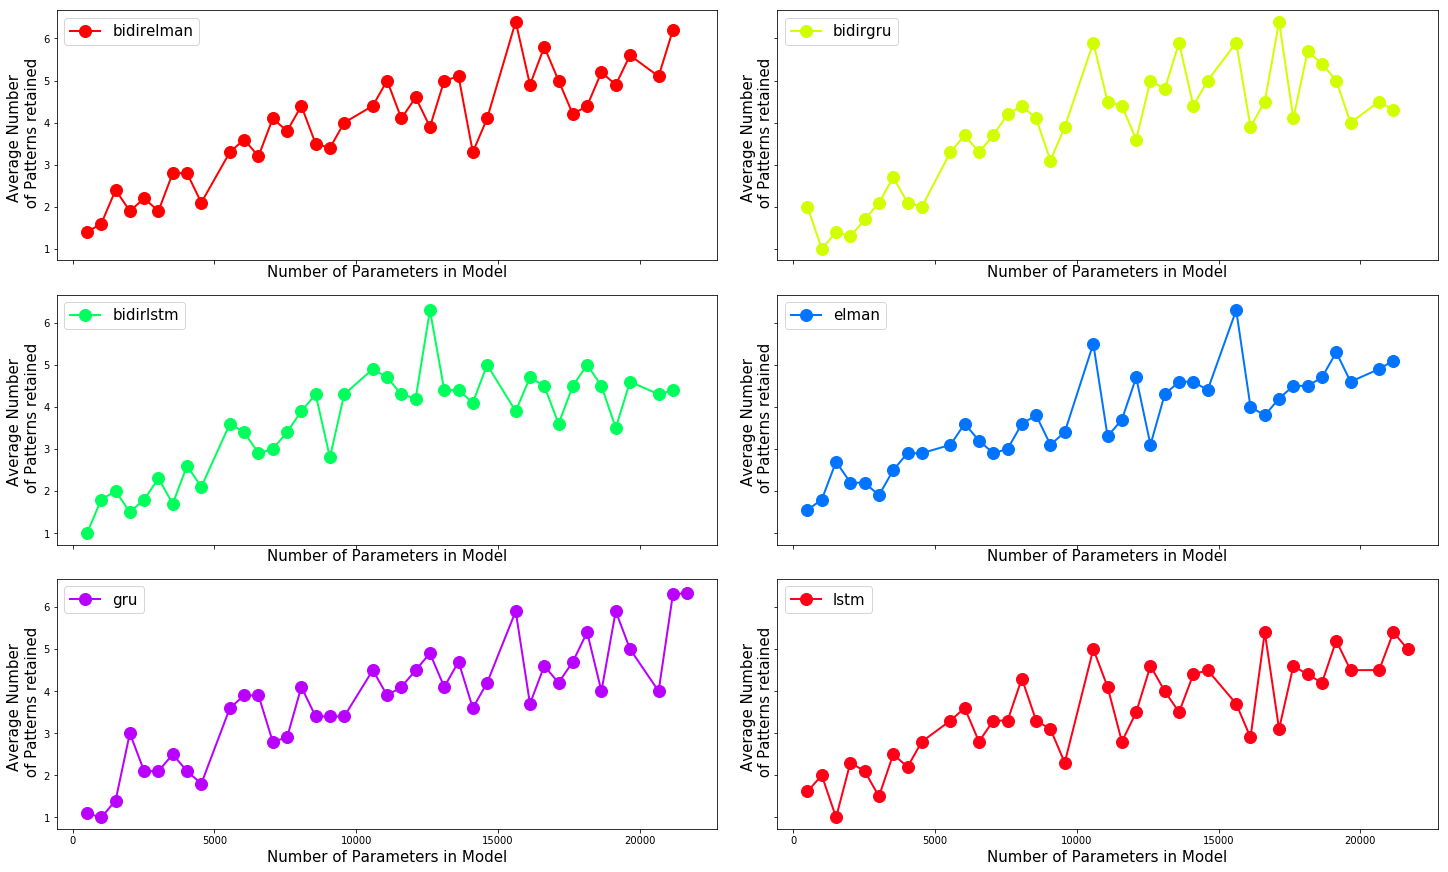

In [65]:
df_g = df.groupby(["nn_type", "model_params"]).agg({"largest_retained" : "mean"}).reset_index()
fig = plot_line_sub_plots(df_g, 
            x="model_params", y="largest_retained", hue="nn_type",
            x_label='Number of Parameters in Model', y_label='Average Number \n of Patterns retained')
fig.savefig("Images/NumPatternsVsParametersRNN_exp1_18_05_2018.pdf", bbox_inches='tight')

### Correlation

In [66]:
x_col = "largest_retained"
filter_col = "nn_type"
filter_col_1 = x_col
x_label = "Number of Patterns"
for filter_val in df[filter_col].unique():
    df_temp = df[df[filter_col] == filter_val]
    df_temp = df_temp.groupby([x_col, "nn_type"]).agg({"model_params": "mean"}).to_records()
    df_temp = pd.DataFrame.from_records(df_temp)
    df_temp[x_col] = df_temp[x_col].astype(float)
    df_temp["model_params"] = df_temp["model_params"].astype(float)
    df_temp.dropna(inplace=True)
    print("Spearman Correlation Between "+x_label+" length and Number of Network Parameters for", filter_val, df_temp[x_col].corr(df_temp["model_params"], method="spearman"))

Spearman Correlation Between Number of Patterns length and Number of Network Parameters for lstm 0.6046512209991844
Spearman Correlation Between Number of Patterns length and Number of Network Parameters for gru 0.8249232913486696
Spearman Correlation Between Number of Patterns length and Number of Network Parameters for elman 0.6679203180128442
Spearman Correlation Between Number of Patterns length and Number of Network Parameters for bidirelman 0.6382140879331544
Spearman Correlation Between Number of Patterns length and Number of Network Parameters for bidirlstm 0.7758545806859575
Spearman Correlation Between Number of Patterns length and Number of Network Parameters for bidirgru 0.6695280228392353


In [67]:
print("\\begin{table}[h!]")
print("\\begin{center}")
print("\\begin{tabular}{ |c|c| } ")

print(" \\toprule")
print(" RNN  &    Spearman Correlation Coefficient \\\\")
print(" \\midrule")

filter_col = "nn_type"
filter_col_1 = x_col
for filter_val in sorted(df[filter_col].unique()):
    df_temp = df[df[filter_col] == filter_val]
    df_temp = df_temp.groupby([x_col, "nn_type"]).agg({"model_params": "mean"}).to_records()
    df_temp = pd.DataFrame.from_records(df_temp)
    df_temp[x_col] = df_temp[x_col].astype(float)
    df_temp["model_params"] = df_temp["model_params"].astype(float)
    
    print(" ",filter_val, " & ", df_temp[x_col].corr(df_temp["model_params"], method="spearman"), "\\\\")

print(" \\hline")
print("\\end{tabular}")
print("\\caption{Correlation between Number of patterns retained \\\\ and the number of network parameters}")
print("\\label{tab:Number of patterns vs num network parameters}")
print("\\end{center}")
print("\\end{table}")

\begin{table}[h!]
\begin{center}
\begin{tabular}{ |c|c| } 
 \toprule
 RNN  &    Spearman Correlation Coefficient \\
 \midrule
  bidirelman  &  0.6382140879331544 \\
  bidirgru  &  0.6695280228392353 \\
  bidirlstm  &  0.7758545806859575 \\
  elman  &  0.6679203180128442 \\
  gru  &  0.8249232913486696 \\
  lstm  &  0.6046512209991844 \\
 \hline
\end{tabular}
\caption{Correlation between Number of patterns retained \\ and the number of network parameters}
\label{tab:Number of patterns vs num network parameters}
\end{center}
\end{table}


### Capacity

In [68]:
df_cap = df.groupby(["nn_type"]).agg({"model_params" : "sum", "largest_retained": "sum"})
df_cap["capacity_ratio"] = df_cap["largest_retained"]/df_cap["model_params"]
df_cap

,model_params,largest_retained,capacity_ratio
nn_type,,,
bidirelman,4052160,1510,0.000373
bidirgru,4052160,1492,0.000368
bidirlstm,4052160,1392,0.000344
elman,4052160,1420,0.000350
gru,4247208,1475,0.000347
lstm,4269384,1384,0.000324


In [69]:
print("\\begin{table}[h!]")
print("\\begin{center}")
print("\\begin{tabular}{ c c } ")

print(" \\toprule")
print(" RNN  &    Pattern Capacity Per Parameter \\\\")
print(" \\midrule")

for i, r in df_cap.reset_index().iterrows():
    print(" ",r["nn_type"], " & ", round(r["capacity_ratio"], 7), "\\\\")

    
print(" \\hline")
print("\\end{tabular}")
print("\\caption{Number of patterns retained \\\\ per single network parameter}")
print("\\label{tab:Number of patterns single param}")
print("\\end{center}")
print("\\end{table}")

\begin{table}[h!]
\begin{center}
\begin{tabular}{ c c } 
 \toprule
 RNN  &    Pattern Capacity Per Parameter \\
 \midrule
  bidirelman  &  0.0003726 \\
  bidirgru  &  0.0003682 \\
  bidirlstm  &  0.0003435 \\
  elman  &  0.0003504 \\
  gru  &  0.0003473 \\
  lstm  &  0.0003242 \\
 \hline
\end{tabular}
\caption{Number of patterns retained \\ per single network parameter}
\label{tab:Number of patterns single param}
\end{center}
\end{table}


0.0003704

### Discussion of results

From the Pearson coefficient, it is clear that there is a positive relationship between the number of patterns that can be retained and the number of network parameters required for all recurrent neural networks. This relationship is more apprent in the Elman RNN en the bidirectional Elman RNN, indicating that they are more dependant on the number of parameters within the network. The network which shows the least dependance is the LSTM and the bidrectional lstm. 

Upon inspecting the the relationship between the number of model parameters and the number of parameters required, as presented in the figure **need to revise in thesis**, it is clear that it is non-linear. This may be the consequence of the variance of the generated datasets at these intervals. Thus, it seems that the number of parameters required is highly depedant on the dataset in question.  

## 2. Investigate which activation function lead to the highest retention of patterns

In [70]:
print("\\begin{table}[h!]")
print("\\begin{center}")
print("\\begin{tabular}{ c c } ")
print(" \\toprule")
print(" Activation function  &    Spearman Correlation Coefficient \\\\")
print(" \\midrule")

filter_col = "activation_func"
filter_col_1 = x_col
for filter_val in sorted(df[filter_col].unique()):
    df_temp = df[(df[filter_col] == filter_val)]
    df_temp = df_temp.groupby([filter_col_1]).agg({"model_params": "mean"}).to_records()
    df_temp = pd.DataFrame.from_records(df_temp)
    df_temp[filter_col_1] = df_temp[filter_col_1].astype(float)
    df_temp["model_params"] = df_temp["model_params"].astype(float)
    spearman_corr = df_temp[filter_col_1].corr(df_temp["model_params"], method='spearman')
    spearman_corr = round(spearman_corr, 4)
    print(" ",filter_val, " & ", spearman_corr, "\\\\")
    
    

print(" \\hline")
print("\\end{tabular}")
print("\\caption{Correlation between Number of patterns retained \\\\ and the number of network parameters \\\\ for each activation function}")
print("\\label{tab:Correlation Number of patterns vs num network parameters for each activation function}")
print("\\end{center}")
print("\\end{table}")

\begin{table}[h!]
\begin{center}
\begin{tabular}{ c c } 
 \toprule
 Activation function  &    Spearman Correlation Coefficient \\
 \midrule
  elu  &  0.7289 \\
  hard_sigmoid  &  0.7143 \\
  linear  &  1.0 \\
  relu  &  0.8587 \\
  selu  &  0.8774 \\
  sigmoid  &  0.3714 \\
  softmax  &  -1.0 \\
  softplus  &  0.4857 \\
  softsign  &  0.8407 \\
  tanh  &  0.7667 \\
 \hline
\end{tabular}
\caption{Correlation between Number of patterns retained \\ and the number of network parameters \\ for each activation function}
\label{tab:Correlation Number of patterns vs num network parameters for each activation function}
\end{center}
\end{table}


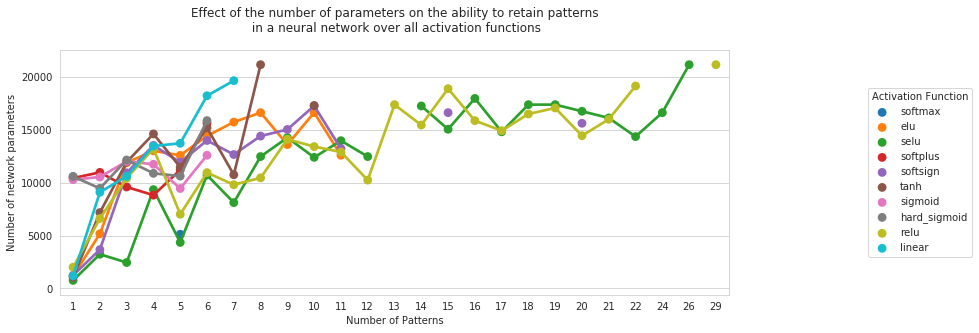

In [71]:
filter_col = "activation_func"
filter_1 = "largest_retained"
x_col = "largest_retained"
x_label = "Number of Patterns"
plot_by_filter(x_col=x_col, 
               y_col="model_params",
               x_label=x_label,
               y_label='Number of network parameters',
               title="Effect of the number of parameters on the ability to retain patterns" + 
                       "\n in a neural network over all activation functions", 
               hue="activation_func",
               legend_title="Activation Function",
              filter_col=filter_col, filter_val=None, df=df)    

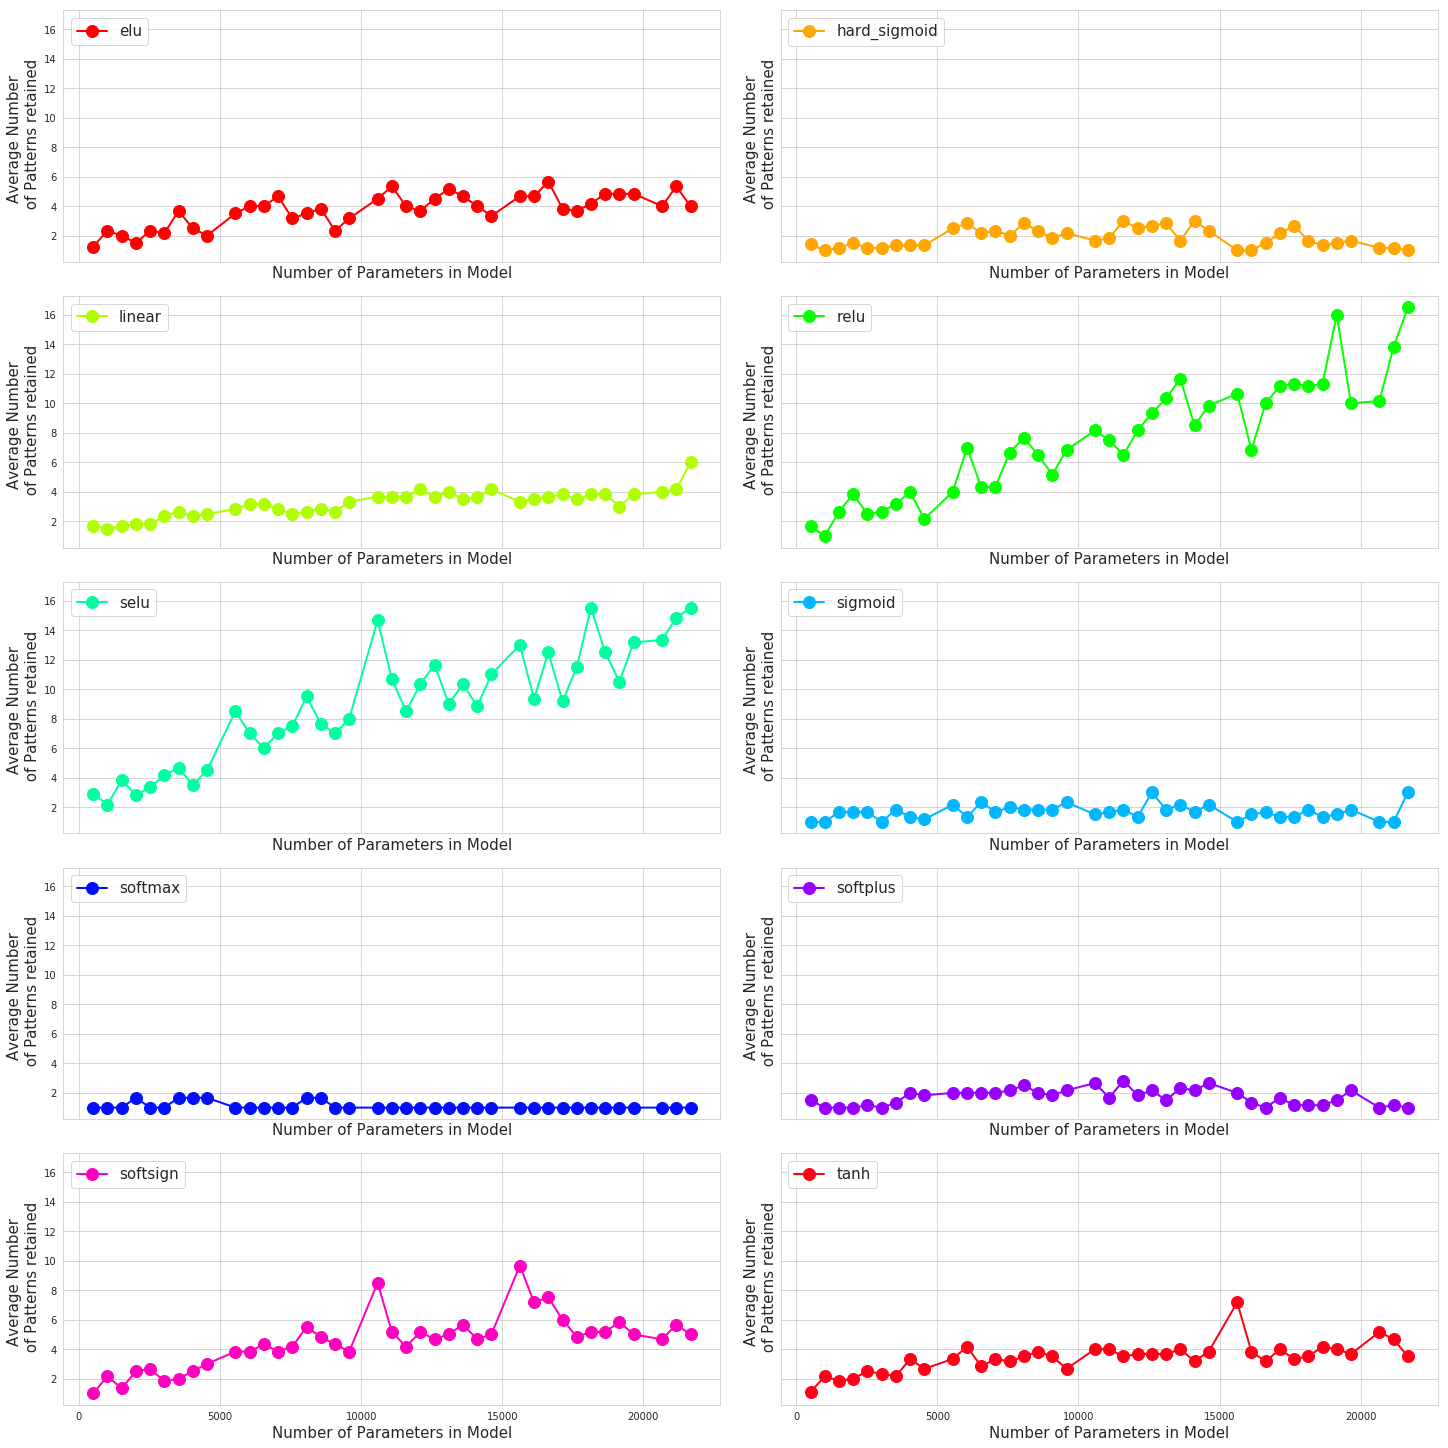

In [72]:
df_g = df.groupby(["activation_func", "model_params"]).agg({"largest_retained" : "mean"}).reset_index()

fig = plot_line_sub_plots(df_g, 
            x="model_params", y="largest_retained", hue="activation_func",
            x_label='Number of Parameters in Model', y_label='Average Number \n of Patterns retained')
fig.savefig("Images/NumPatternsVsParametersActFunc_exp1_1.pdf", bbox_inches='tight')

### Correlation of activation functions  ∝ number of patterns

In [73]:
filter_col = "activation_func"
df_correlation_matrix = pd.DataFrame(columns=df["nn_type"].unique())
df_correlation_matrix["activation_func"] = df[filter_col].unique()
df_correlation_matrix.index =  df_correlation_matrix["activation_func"]
del df_correlation_matrix["activation_func"]
for filter_val in df[filter_col].unique():
    for filter_val_1 in df["nn_type"].unique():
        df_temp = df[(df["nn_type"] == filter_val_1) & (df["activation_func"] == filter_val)]
        df_temp["model_params"] = df_temp["model_params"].astype(float)
        df_correlation_matrix.at[filter_val, filter_val_1] =   df_temp[filter_col_1].corr(df_temp["model_params"], method="spearman")
        print("df_correlation_matrix Correlation Between "+x_label+" and Number of Network Parameters for", filter_val_1 + " "+ filter_val, df_temp[filter_col_1].corr(df_temp["model_params"], method="spearman"), df_temp[filter_col_1].cov(df_temp["model_params"]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


df_correlation_matrix Correlation Between Number of Patterns and Number of Network Parameters for lstm softmax nan 0.0
df_correlation_matrix Correlation Between Number of Patterns and Number of Network Parameters for gru softmax -0.32480474761612627 -2301.6
df_correlation_matrix Correlation Between Number of Patterns and Number of Network Parameters for elman softmax -0.14414481009537106 -616.2267206477734
df_correlation_matrix Correlation Between Number of Patterns and Number of Network Parameters for bidirelman softmax nan 0.0
df_correlation_matrix Correlation Between Number of Patterns and Number of Network Parameters for bidirlstm softmax nan 0.0
df_correlation_matrix Correlation Between Number of Patterns and Number of Network Parameters for bidirgru softmax -0.07230577556141186 -436.6639676113361
df_correlation_matrix Correlation Between Number of Patterns and Number of Network Parameters for lstm elu 0.42452279841192425 4182.876923076923
df_correlation_matrix Correlation Between

df_correlation_matrix Correlation Between Number of Patterns and Number of Network Parameters for elman linear 0.26071953238123774 1371.2064777327935
df_correlation_matrix Correlation Between Number of Patterns and Number of Network Parameters for bidirelman linear 0.41863731596646 2259.8380566801616
df_correlation_matrix Correlation Between Number of Patterns and Number of Network Parameters for bidirlstm linear 0.5386194352007797 4836.971659919027
df_correlation_matrix Correlation Between Number of Patterns and Number of Network Parameters for bidirgru linear 0.5514393498202574 5131.82186234818


In [39]:
filter_col_1

'largest_retained'

In [41]:
df_temp["largest_retained"].corr(df_temp["model_params"])

nan

In [74]:
df_correlation_matrix.loc[:,'Average'] = df_correlation_matrix.mean(axis=1)
df_correlation_matrix

,lstm,gru,elman,bidirelman,bidirlstm,bidirgru,Average
activation_func,,,,,,,
softmax,NaN,-0.324805,-0.144145,NaN,NaN,-0.0723058,-0.180418
elu,0.424523,0.611276,0.569186,0.602826,0.481897,0.623376,0.552180
selu,0.762258,0.774942,0.849666,0.583175,0.812062,0.690484,0.745431
softplus,0.0549025,-0.0198777,-0.237229,-0.351995,0.0441405,0.212009,-0.049675
softsign,0.333252,0.684303,0.71297,0.722805,0.527821,0.696512,0.612944
tanh,0.606841,0.405003,0.412908,0.671586,0.388715,0.499986,0.497507
sigmoid,0.205584,0.355011,-0.403161,-0.321401,-0.0843924,0.385082,0.022787
hard_sigmoid,-0.113732,0.364785,-0.513391,-0.408607,0.227566,0.390446,-0.008822
relu,0.564702,0.667479,0.831264,0.873506,0.505511,0.622512,0.677496


In [75]:
df_correlation_matrix.sort_index(inplace=True)
df_correlation_matrix = df_correlation_matrix[sorted(df_correlation_matrix.columns)]
for c in df_correlation_matrix.columns:
    df_correlation_matrix[c] = df_correlation_matrix[c].apply(lambda x: round(x, 4)) 

df_correlation_matrix.sort_index(inplace=True)
print("\\begin{table}[h!]")
print("{Activation function} &  bidirelamn &  bidirgru &  bidirlstm &   elman &     gru &    lstm \\\\")
print("\\midrule")
print(df_correlation_matrix.to_latex())
print("\\caption{Correlation between Number of patterns retained \\\\ and the number of network parameters \\\\ per activation function for each RNN}")
print("\\label{tab:Number of patterns per Activation function vs num network parameters for each RNN}")
print("\\end{table}")

\begin{table}[h!]
{Activation function} &  bidirelamn &  bidirgru &  bidirlstm &   elman &     gru &    lstm \\
\midrule
\begin{tabular}{lrrrrrrr}
\toprule
{} &  Average &  bidirelman &  bidirgru &  bidirlstm &   elman &     gru &    lstm \\
activation\_func &          &             &           &            &         &         &         \\
\midrule
elu             &   0.5522 &      0.6028 &    0.6234 &     0.4819 &  0.5692 &  0.6113 &  0.4245 \\
hard\_sigmoid    &  -0.0088 &     -0.4086 &    0.3904 &     0.2276 & -0.5134 &  0.3648 & -0.1137 \\
linear          &   0.5328 &      0.4186 &    0.5514 &     0.5386 &  0.2607 &  0.6083 &  0.8190 \\
relu            &   0.6775 &      0.8735 &    0.6225 &     0.5055 &  0.8313 &  0.6675 &  0.5647 \\
selu            &   0.7454 &      0.5832 &    0.6905 &     0.8121 &  0.8497 &  0.7749 &  0.7623 \\
sigmoid         &   0.0228 &     -0.3214 &    0.3851 &    -0.0844 & -0.4032 &  0.3550 &  0.2056 \\
softmax         &  -0.1804 &         NaN &   -0.0723 &

### Capacity

In [76]:
df_cap = df.groupby(["nn_type", "activation_func"]).agg({"model_params" : "sum", "largest_retained": "sum"})
df_cap["capacity_ratio"] = df_cap["largest_retained"]/df_cap["model_params"]
df_cap = pd.DataFrame(df_cap.to_records())
df_cap = df_cap.pivot(index="activation_func", columns="nn_type", values="capacity_ratio")
df_cap.sort_index(inplace=True)
df_cap

nn_type,bidirelman,bidirgru,bidirlstm,elman,gru,lstm
activation_func,,,,,,
elu,0.000375,0.000395,0.000343,0.000323,0.000337,0.000326
hard_sigmoid,0.000151,0.000237,0.000148,0.000148,0.000199,0.000171
linear,0.000259,0.000365,0.000306,0.000227,0.000326,0.000302
relu,0.001123,0.000573,0.000437,0.001022,0.000614,0.000410
selu,0.000612,0.000812,0.001066,0.000669,0.000825,0.000935
sigmoid,0.000126,0.000188,0.000143,0.000141,0.000197,0.000138
softmax,0.000096,0.000116,0.000096,0.000106,0.000122,0.000096
softplus,0.000109,0.000202,0.000200,0.000109,0.000176,0.000185
softsign,0.000555,0.000444,0.000341,0.000481,0.000337,0.000391


In [77]:
df_cap.sort_index(inplace=True)
df_cap = df_cap[sorted(df_cap.columns)]
# for c in df_cap.columns:
#     df_cap[c] = df_cap[c].apply(lambda x: round(x, 8)) 

df_cap.sort_index(inplace=True)
print("\\begin{table}[h!]")
print("{Activation function} &  bidirelamn &  bidirgru &  bidirlstm &   elman &     gru &    lstm \\\\")
print("\\midrule")
print(df_cap.to_latex())
print("\\caption{Per parameter capacity between Number of patterns retained \\\\ and the number of network parameters \\\\ per activation function for each RNN}")
print("\\label{tab:Number of patterns per Activation function vs num network parameters for each RNN}")
print("\\end{table}")

\begin{table}[h!]
{Activation function} &  bidirelamn &  bidirgru &  bidirlstm &   elman &     gru &    lstm \\
\midrule
\begin{tabular}{lrrrrrr}
\toprule
nn\_type &  bidirelman &  bidirgru &  bidirlstm &     elman &       gru &      lstm \\
activation\_func &             &           &            &           &           &           \\
\midrule
elu             &    0.000375 &  0.000395 &   0.000343 &  0.000323 &  0.000337 &  0.000326 \\
hard\_sigmoid    &    0.000151 &  0.000237 &   0.000148 &  0.000148 &  0.000199 &  0.000171 \\
linear          &    0.000259 &  0.000365 &   0.000306 &  0.000227 &  0.000326 &  0.000302 \\
relu            &    0.001123 &  0.000573 &   0.000437 &  0.001022 &  0.000614 &  0.000410 \\
selu            &    0.000612 &  0.000812 &   0.001066 &  0.000669 &  0.000825 &  0.000935 \\
sigmoid         &    0.000126 &  0.000188 &   0.000143 &  0.000141 &  0.000197 &  0.000138 \\
softmax         &    0.000096 &  0.000116 &   0.000096 &  0.000106 &  0.000122 &  0.00009

## 3. Relationship between the number of patterns and number of layers

In [78]:
df["num_layers"] = df["nodes_in_layer"].apply(len)
df.groupby(["num_layers", "model_params"]).agg({"largest_retained": "mean"})

largest_retained
num_layers model_params                  
1          504                   1.446281
           1008                  1.533333
           1512                  1.816667
           2016                  2.033333
           2520                  2.016667
           3024                  1.966667
           3528                  2.450000
           4032                  2.450000
           4536                  2.283333
2          5544                  3.366667
           6048                  3.633333
           6552                  3.216667
           7056                  3.300000
           7560                  3.433333
           8064                  4.116667
           8568                  3.733333
           9072                  3.150000
           9576                  3.550000
3          10584                 5.033333
           11088                 4.250000
           11592                 3.900000
           12096                 4.183333
           12600                 4.633333
           13104                 4.433333
           13608                 4.700000
           14112                 4.066667
           14616                 4.533333
4          15624                 5.350000
           16128                 4.016667
           16632                 4.766667
           17136                 4.416667
           17640                 4.433333
           18144                 4.900000
           18648                 4.666667
           19152                 4.966667
           19656                 4.716667
5          20664                 4.550000
           21168                 5.283333
           21672                 5.631579

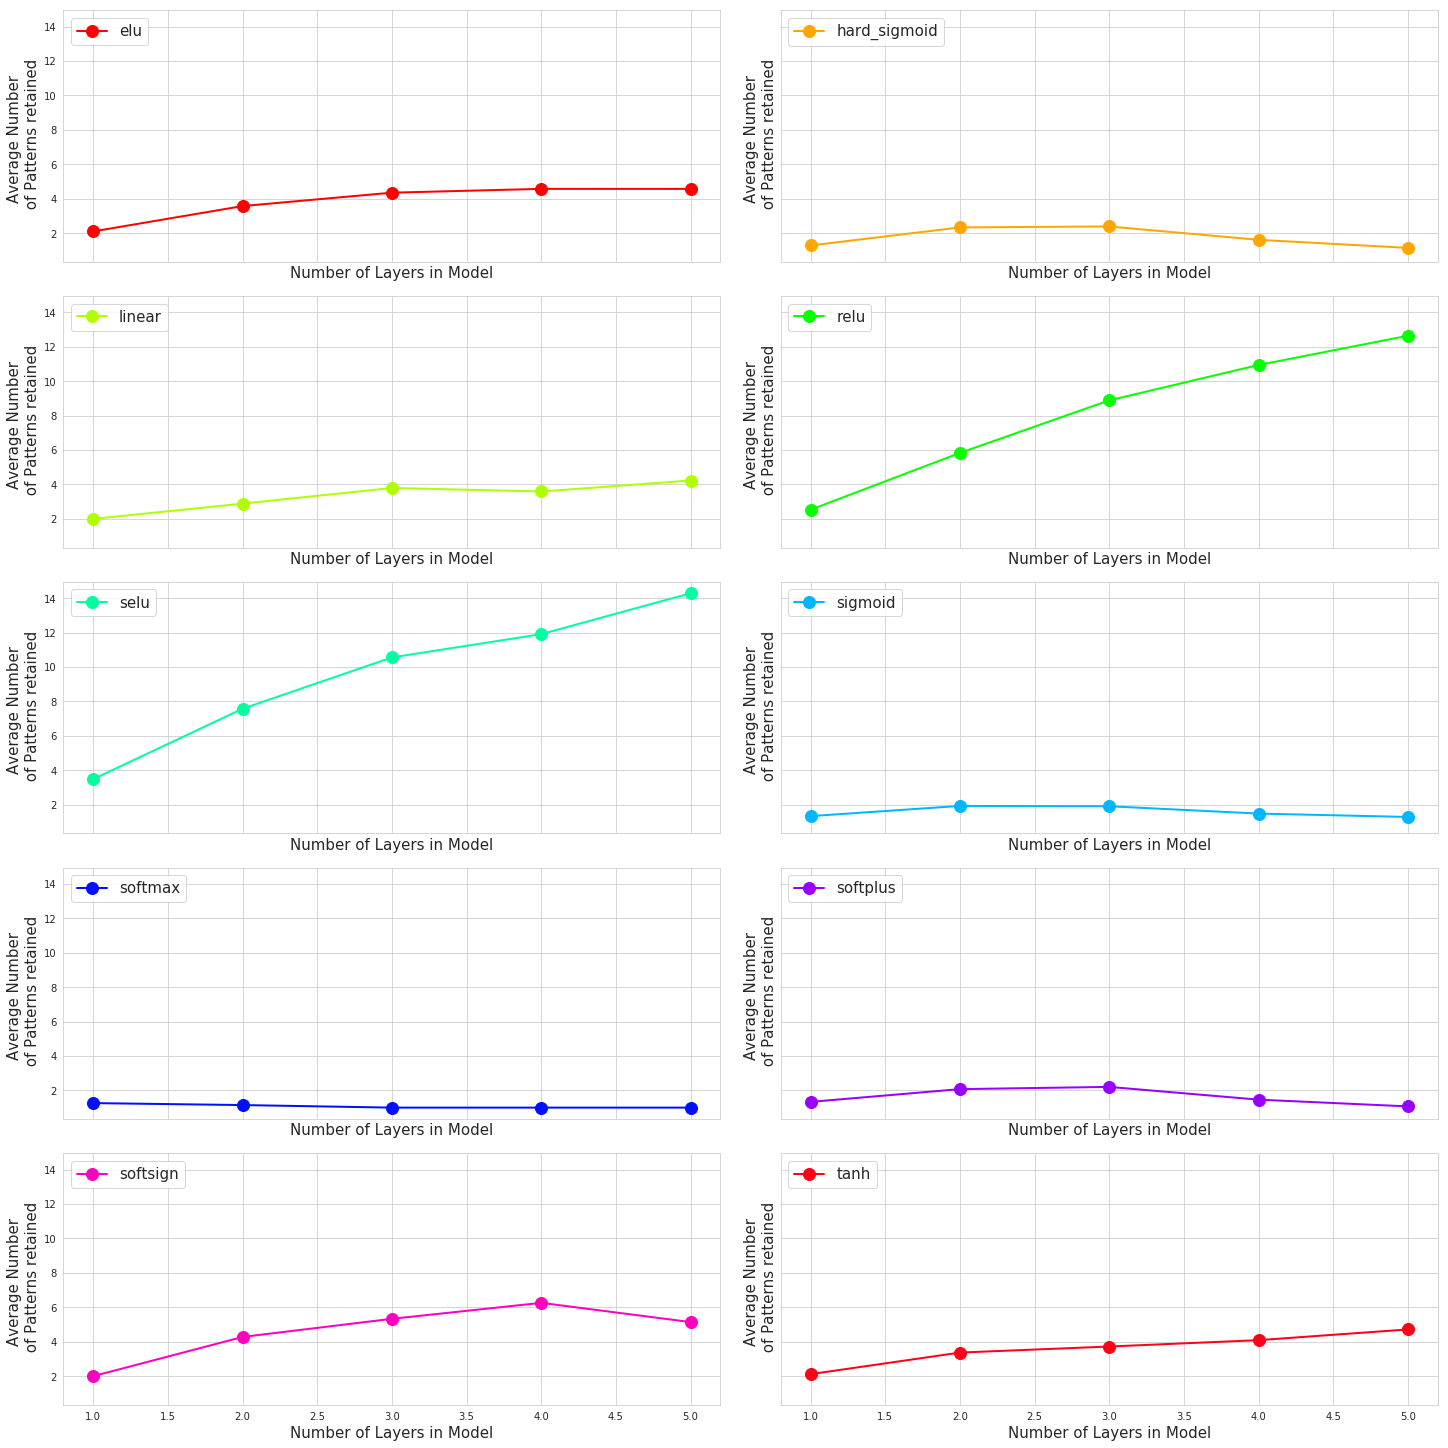

In [79]:
df_g = df.groupby(["activation_func", "num_layers"]).agg({"largest_retained" : "mean"}).reset_index()
fig = plot_line_sub_plots(df_g, 
            x="num_layers", y="largest_retained", hue="activation_func",
            x_label='Number of Layers in Model', y_label='Average Number \n of Patterns retained')
fig.savefig("Images/NumPatternsVsNumLayersActFunc_exp1_1.pdf", bbox_inches='tight')

In [80]:
df_cap = df.groupby(["nn_type", "activation_func", "num_layers"]).agg({"model_params" : "mean", "largest_retained": "max"})
df_cap = pd.DataFrame(df_cap.to_records())
df_cap["capacity_ratio"] = df_cap["largest_retained"]/df_cap["model_params"]
# df_cap = df_cap.pivot(index="activation_func", columns="nn_type", values="capacity_ratio")
df_cap

,nn_type,activation_func,num_layers,model_params,largest_retained,capacity_ratio
0,bidirelman,elu,1,2318.400000,4,0.001725
1,bidirelman,elu,2,7560.000000,7,0.000926
2,bidirelman,elu,3,12600.000000,5,0.000397
3,bidirelman,elu,4,17640.000000,9,0.000510
4,bidirelman,elu,5,20916.000000,5,0.000239
5,bidirelman,hard_sigmoid,1,2318.400000,2,0.000863
6,bidirelman,hard_sigmoid,2,7560.000000,4,0.000529
7,bidirelman,hard_sigmoid,3,12600.000000,2,0.000159
8,bidirelman,hard_sigmoid,4,17640.000000,1,0.000057
9,bidirelman,hard_sigmoid,5,20916.000000,1,0.000048


In [81]:
df_cap["capacity_ratio_diff"] = [0]*df_cap.shape[0]
prev_nn = ""
prev_activation = ""
prev_cap_ratio = ""
for i, row in df_cap.iterrows():
    if row["nn_type"] == prev_nn and row["activation_func"] == prev_activation:
        df_cap.iloc[i, df_cap.columns.get_loc('capacity_ratio_diff')] = row["capacity_ratio"] - prev_cap_ratio
    else:
        df_cap.iloc[i, df_cap.columns.get_loc('capacity_ratio_diff')] = np.nan
    prev_nn = row["nn_type"]
    prev_activation = row["activation_func"]
    prev_cap_ratio = row["capacity_ratio"]
df_cap

,nn_type,activation_func,num_layers,model_params,largest_retained,capacity_ratio,capacity_ratio_diff
0,bidirelman,elu,1,2318.400000,4,0.001725,NaN
1,bidirelman,elu,2,7560.000000,7,0.000926,-0.000799
2,bidirelman,elu,3,12600.000000,5,0.000397,-0.000529
3,bidirelman,elu,4,17640.000000,9,0.000510,0.000113
4,bidirelman,elu,5,20916.000000,5,0.000239,-0.000271
5,bidirelman,hard_sigmoid,1,2318.400000,2,0.000863,NaN
6,bidirelman,hard_sigmoid,2,7560.000000,4,0.000529,-0.000334
7,bidirelman,hard_sigmoid,3,12600.000000,2,0.000159,-0.000370
8,bidirelman,hard_sigmoid,4,17640.000000,1,0.000057,-0.000102
9,bidirelman,hard_sigmoid,5,20916.000000,1,0.000048,-0.000009


In [82]:
df_cap_group = df_cap.groupby(["activation_func", "num_layers"]).agg({"capacity_ratio": "mean"}).reset_index()
df_cap_group

,activation_func,num_layers,capacity_ratio
0,elu,1,0.002013
1,elu,2,0.000728
2,elu,3,0.000556
3,elu,4,0.000378
4,elu,5,0.000262
5,hard_sigmoid,1,0.001006
6,hard_sigmoid,2,0.000551
7,hard_sigmoid,3,0.000317
8,hard_sigmoid,4,0.000161
9,hard_sigmoid,5,0.000055


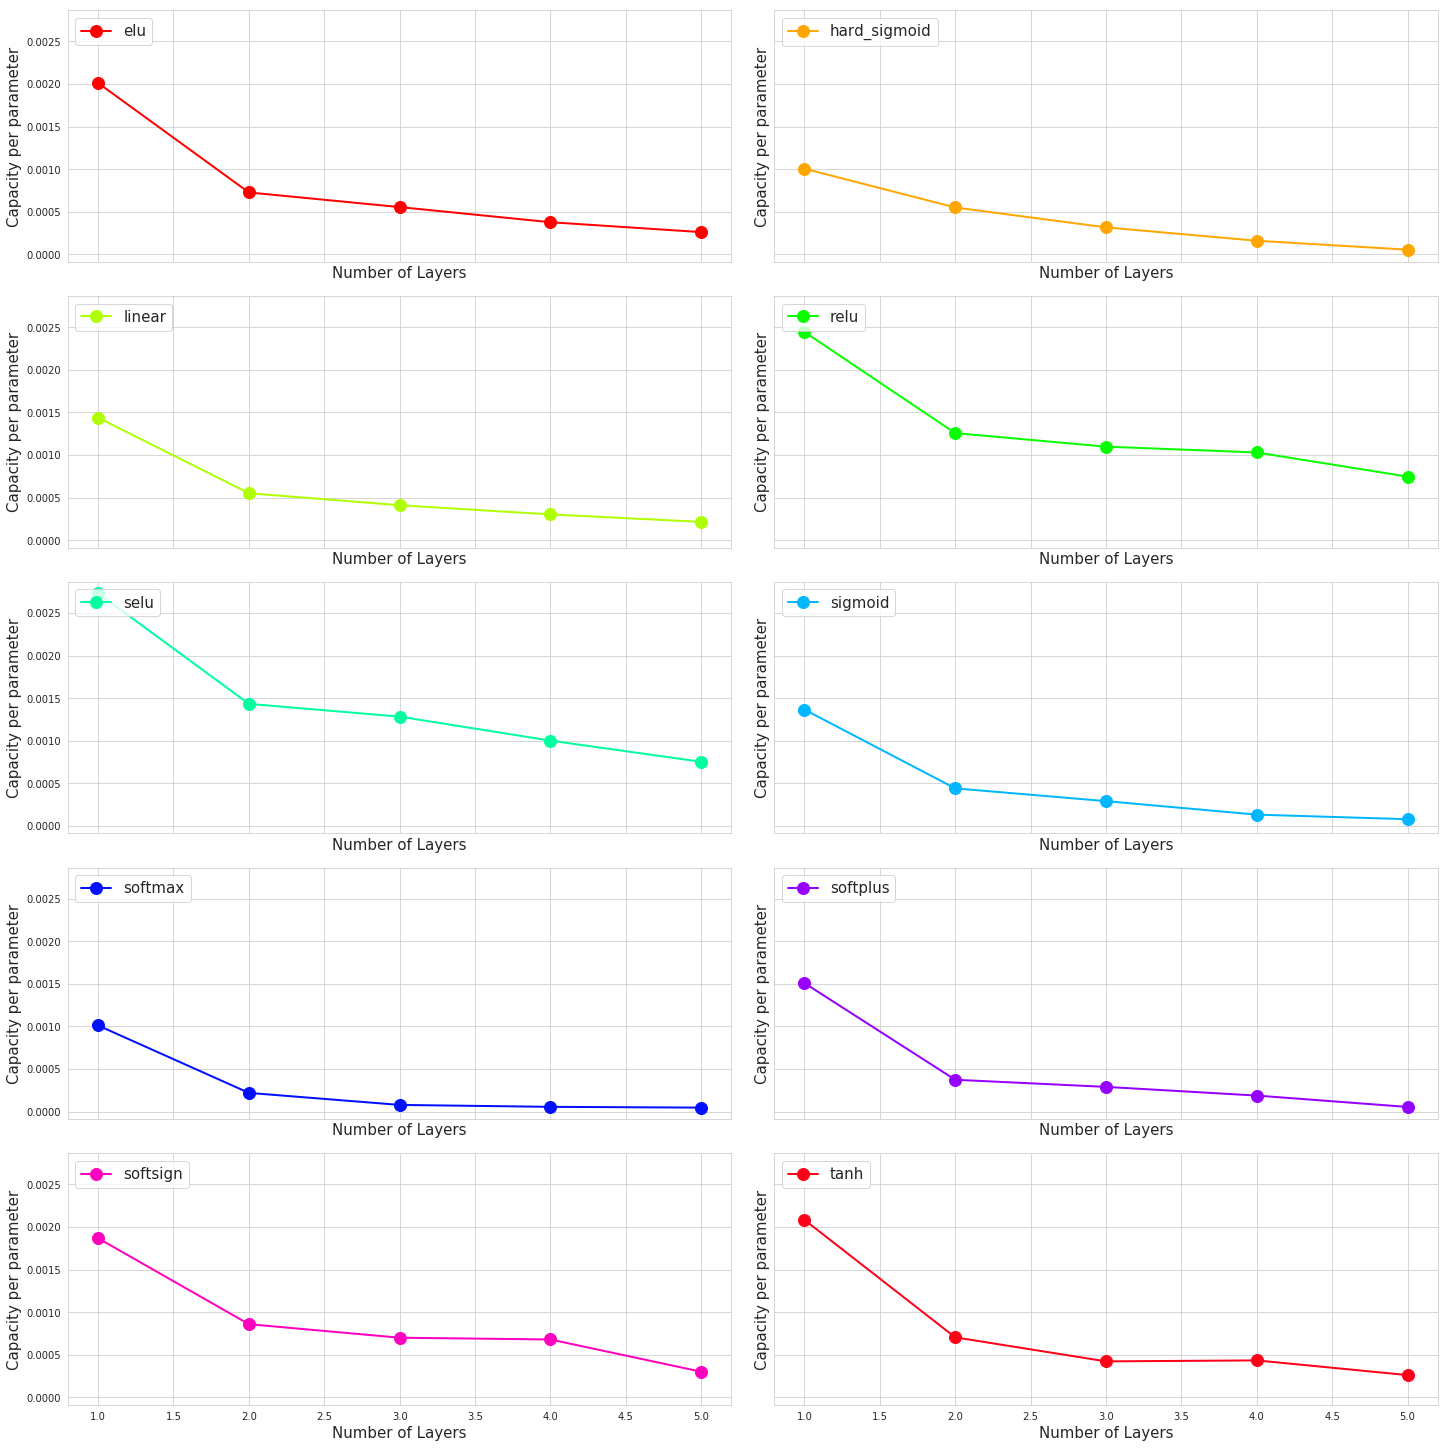

In [83]:
fig = plot_line_sub_plots(df_cap_group, 
            x="num_layers", y="capacity_ratio", hue="activation_func",
            x_label='Number of Layers', y_label='Capacity per parameter')

fig.savefig("Images/CapacityPerParameterVsNumLayersActFunc_exp1_1.pdf", bbox_inches='tight')

In [84]:
print("\\begin{table}[h!]")

latex_str = df_cap.groupby(["nn_type", "num_layers", "activation_func"]).agg({"capacity_ratio":"max"}).unstack().to_latex()
latex_str = latex_str.replace("nn\\_type", "RNN Type")
latex_str = latex_str.replace("num\\_layers", "Number of Layers")
latex_str = latex_str.replace("capacity\\_ratio", "Capacity Per Parameter")
print(latex_str)


print("""\\caption{Per parameter capacity for each RNN \\\\ 
            per activation function  \\\\  
              at various layer depths}""")
print("\\label{tab:Number of patterns per Activation Per RNN Per Layer}")
print("\\end{table}")

\begin{table}[h!]
\begin{tabular}{llrrrrrrrrrr}
\toprule
     & {} & \multicolumn{10}{l}{Capacity Per Parameter} \\
     & activation\_func &            elu & hard\_sigmoid &    linear &      relu &      selu &   sigmoid &   softmax &  softplus &  softsign &      tanh \\
RNN Type & Number of Layers &                &              &           &           &           &           &           &           &           &           \\
\midrule
bidirelman & 1 &       0.001725 &     0.000863 &  0.001294 &  0.003019 &  0.003019 &  0.000863 &  0.000431 &  0.001294 &  0.001725 &  0.001725 \\
     & 2 &       0.000926 &     0.000529 &  0.000529 &  0.001852 &  0.001455 &  0.000397 &  0.000132 &  0.000132 &  0.001058 &  0.000397 \\
     & 3 &       0.000397 &     0.000159 &  0.000397 &  0.001667 &  0.000873 &  0.000159 &  0.000079 &  0.000079 &  0.000794 &  0.000397 \\
     & 4 &       0.000510 &     0.000057 &  0.000227 &  0.001247 &  0.000567 &  0.000057 &  0.000057 &  0.000057 &  0.000624 &  0.0005

## Per parameter capacity for each RNN for increasing layers

In [90]:
print("\\begin{table}[h!]")

latex_str = df_cap.groupby(["nn_type", "num_layers"]).agg({"capacity_ratio":"mean"}).unstack().to_latex()
latex_str = latex_str.replace("nn\\_type", "RNN Type")
latex_str = latex_str.replace("num\\_layers", "Number of Layers")
latex_str = latex_str.replace("capacity\\_ratio", "Capacity Per Parameter")
print(latex_str)


print("""\\caption{Per parameter capacity for each RNN \\\\ 
            per activation function  \\\\  
              at various layer depths}""")
print("\\label{tab:Number of patterns per Activation Per RNN Per Layer}")
print("\\end{table}")

\begin{table}[h!]
\begin{tabular}{lrrrrr}
\toprule
{} & \multicolumn{5}{l}{Capacity Per Parameter} \\
Number of Layers &              1 &         2 &         3 &         4 &         5 \\
RNN Type    &                &           &           &           &           \\
\midrule
bidirelman &       0.001596 &  0.000741 &  0.000500 &  0.000397 &  0.000316 \\
bidirgru   &       0.001639 &  0.000728 &  0.000635 &  0.000493 &  0.000244 \\
bidirlstm  &       0.001725 &  0.000767 &  0.000587 &  0.000402 &  0.000220 \\
elman      &       0.001898 &  0.000661 &  0.000484 &  0.000408 &  0.000258 \\
gru        &       0.001553 &  0.000675 &  0.000579 &  0.000465 &  0.000326 \\
lstm       &       0.002074 &  0.000701 &  0.000484 &  0.000454 &  0.000302 \\
\bottomrule
\end{tabular}

\caption{Per parameter capacity for each RNN \\ 
            per activation function  \\  
              at various layer depths}
\label{tab:Number of patterns per Activation Per RNN Per Layer}
\end{table}


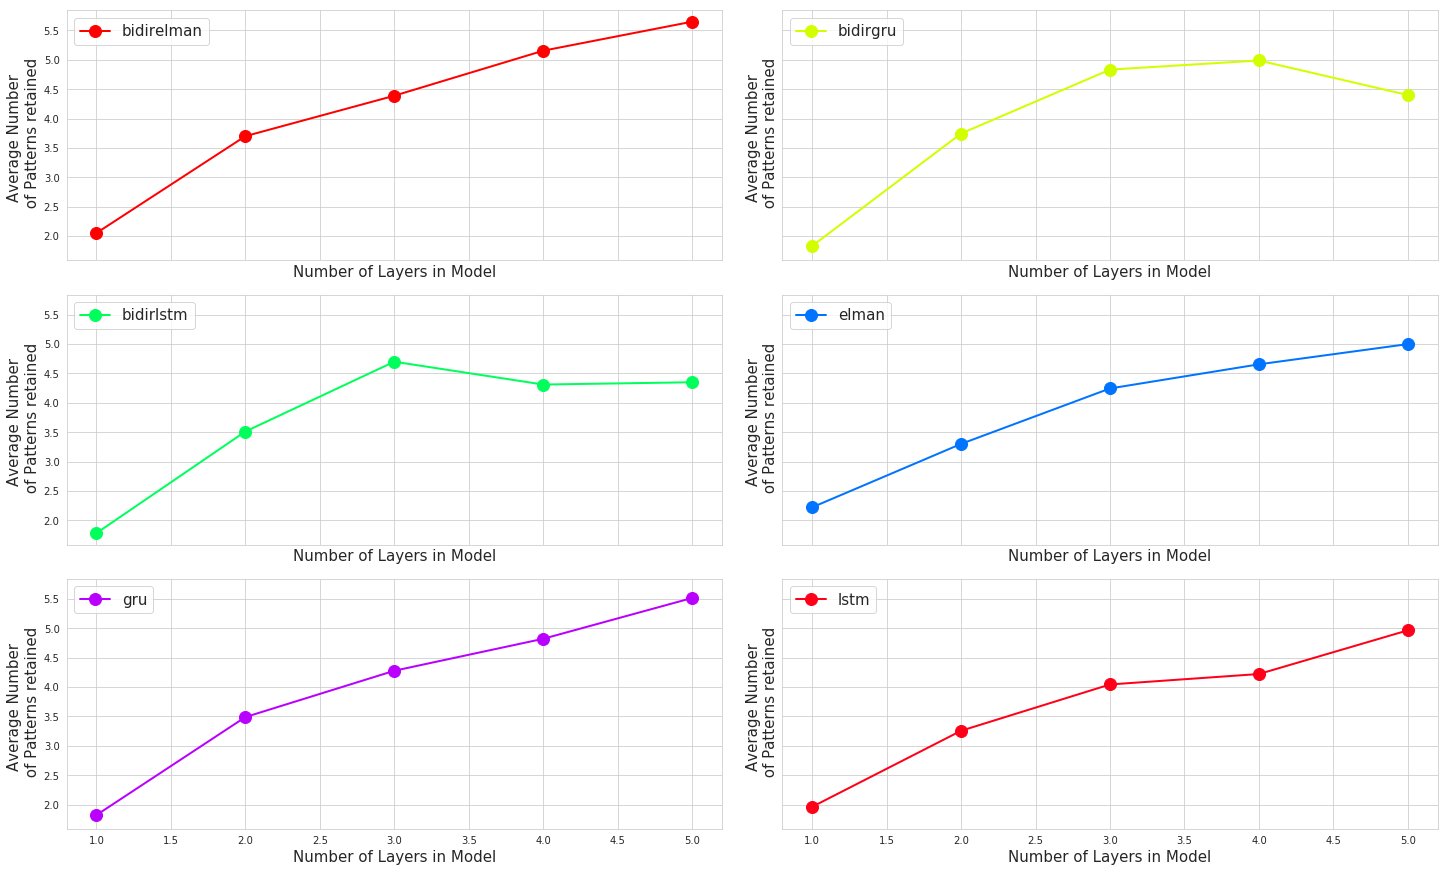

In [88]:
df_g = df.groupby(["nn_type", "num_layers"]).agg({"largest_retained" : "mean"}).reset_index()
fig = plot_line_sub_plots(df_g, 
            x="num_layers", y="largest_retained", hue="nn_type",
            x_label='Number of Layers in Model', y_label='Average Number \n of Patterns retained')
fig.savefig("Images/NumPatternsVsNumLayersNntype_exp1_1.pdf", bbox_inches='tight')

In [85]:
df_cap_group = df_cap.groupby(["nn_type", "num_layers"]).agg({"capacity_ratio": "mean"}).reset_index()
df_cap_group

,nn_type,num_layers,capacity_ratio
0,bidirelman,1,0.001596
1,bidirelman,2,0.000741
2,bidirelman,3,0.000500
3,bidirelman,4,0.000397
4,bidirelman,5,0.000316
5,bidirgru,1,0.001639
6,bidirgru,2,0.000728
7,bidirgru,3,0.000635
8,bidirgru,4,0.000493
9,bidirgru,5,0.000244


In [91]:
print("\\begin{table}[h!]")

latex_str = df_cap.groupby(["nn_type", "num_layers"]).agg({"capacity_ratio":"mean"}).unstack().to_latex()
latex_str = latex_str.replace("nn\\_type", "RNN Type")
latex_str = latex_str.replace("num\\_layers", "Number of Layers")
latex_str = latex_str.replace("capacity\\_ratio", "Capacity Per Parameter")
print(latex_str)


print("""\\caption{Per parameter capacity for each RNN \\\\ 
            per activation function  \\\\  
              at various layer depths}""")
print("\\label{tab:Number of patterns per Activation Per RNN Per Layer}")
print("\\end{table}")

\begin{table}[h!]
\begin{tabular}{lrrrrr}
\toprule
{} & \multicolumn{5}{l}{Capacity Per Parameter} \\
Number of Layers &              1 &         2 &         3 &         4 &         5 \\
RNN Type    &                &           &           &           &           \\
\midrule
bidirelman &       0.001596 &  0.000741 &  0.000500 &  0.000397 &  0.000316 \\
bidirgru   &       0.001639 &  0.000728 &  0.000635 &  0.000493 &  0.000244 \\
bidirlstm  &       0.001725 &  0.000767 &  0.000587 &  0.000402 &  0.000220 \\
elman      &       0.001898 &  0.000661 &  0.000484 &  0.000408 &  0.000258 \\
gru        &       0.001553 &  0.000675 &  0.000579 &  0.000465 &  0.000326 \\
lstm       &       0.002074 &  0.000701 &  0.000484 &  0.000454 &  0.000302 \\
\bottomrule
\end{tabular}

\caption{Per parameter capacity for each RNN \\ 
            per activation function  \\  
              at various layer depths}
\label{tab:Number of patterns per Activation Per RNN Per Layer}
\end{table}


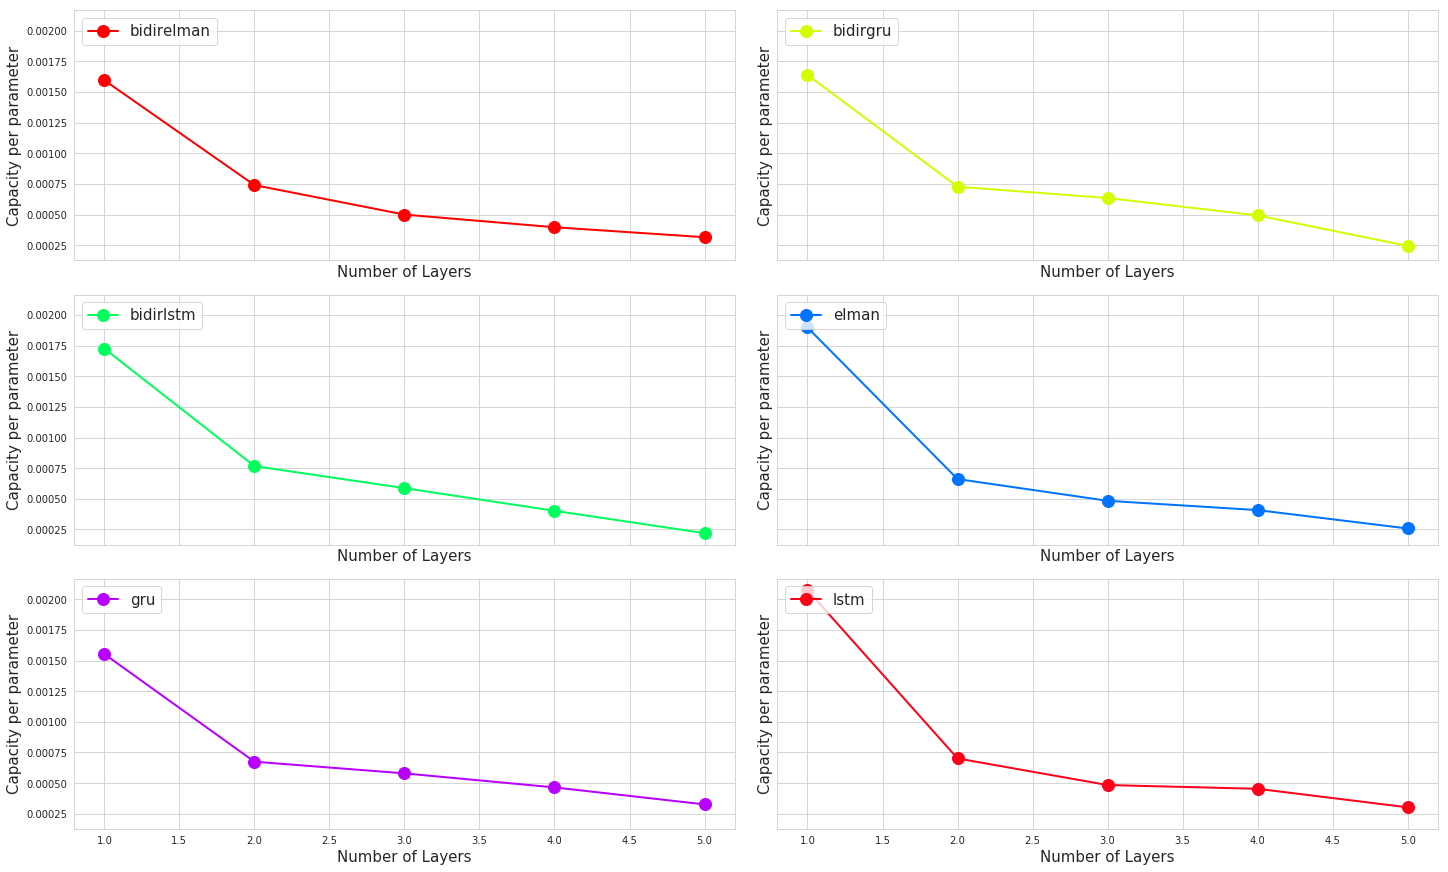

In [86]:
fig = plot_line_sub_plots(df_cap_group, 
            x="num_layers", y="capacity_ratio", hue="nn_type",
            x_label='Number of Layers', y_label='Capacity per parameter')

fig.savefig("Images/CapacityPerParameterVsNumLayers_exp1_1.pdf", bbox_inches='tight')